# DATA PREPARATION

In [6]:
chunksize = 100000
churn = pd.read_csv('data_20171001_20190930.csv', chunksize=100000, iterator=True)
data = pd.concat(churn, ignore_index=True)
data_head = data.head()
data_head['amount'] = data_head['amount'].map('${:,.2f}'.format)

In [5]:
data_head

,customer_id,date,quantity,amount
0,2100395099,20171026,17,$38.80
1,2100068562,20171012,36,$137.25
2,2100006589,20171009,22,$91.02
3,2100628482,20180102,8,$57.28
4,2100618183,20180111,12,$93.47


In [6]:
# Observing the dataset
data.describe()

In [ ]:
data['date'] = pd.to_datetime(data.date, format="%Y%m%d")
from lifetimes.utils import summary_data_from_transaction_data
# lifetimes provides a transaction log -> rfm util function
training = summary_data_from_transaction_data(
     data,
    'customer_id',
    'date',
    monetary_value_col = 'amount',
    observation_period_end=pd.to_datetime('2018-09-30'),
    freq='D'
)
training.to_csv('training_day.csv')

In [7]:
data_20181001_20190930 = data[(data['date'] >=20181001) & (data['date'] <=20190930)]
data_20181001_20190930['date'] = pd.to_datetime(data_20181001_20190930.date, format="%Y%m%d")
from lifetimes.utils import summary_data_from_transaction_data
# lifetimes provides a transaction log -> rfm util function
test = summary_data_from_transaction_data(
     data_20181001_20190930,
    'customer_id',
    'date',
    monetary_value_col = 'amount',
    observation_period_end=pd.to_datetime('2019-09-30'),
    freq='D'
)
test.to_csv('test_day.csv')

In [47]:
# Reading the Training RFM(20171001~20180930) anad Test RFM(20181001~20190930)
training = pd.read_csv("training_day.csv",index_col='customer_id')
test = pd.read_csv("test_day.csv",index_col='customer_id')

In [4]:
training_head = training.head()
training_head['monetary_value'] = training_head['monetary_value'].map('${:,.2f}'.format)
training_head

,frequency,recency,T,monetary_value
customer_id,,,,
2100000000,95.0,363.0,363.0,$95.27
2100000001,96.0,358.0,362.0,$37.43
2100000002,2.0,181.0,204.0,$13.79
2100000003,140.0,361.0,362.0,$64.74
2100000004,184.0,358.0,360.0,$20.97


# 1. Predicting the customer future transactions

### Delete the outliers

Text(0.5,1,'Numbers of repeated purchase by NWNZ clubcard customers from 2017-10-01 to 2018-09-30')

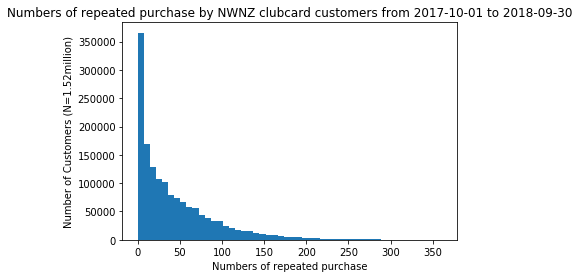

In [9]:
# Looking the rfm frequency distribution
%matplotlib inline
import matplotlib.pyplot as plt
training['frequency'].plot(kind='hist', bins=50)
plt.ylabel('Number of Customers (N=1.52million)')
plt.xlabel('Numbers of repeated purchase')
plt.title('Numbers of repeated purchase by NWNZ clubcard customers from 2017-10-01 to 2018-09-30')

Text(0.5,1,'Average daily purchased spent by NWNZ clubcard customers from 2017-10-01 to 2018-09-30')

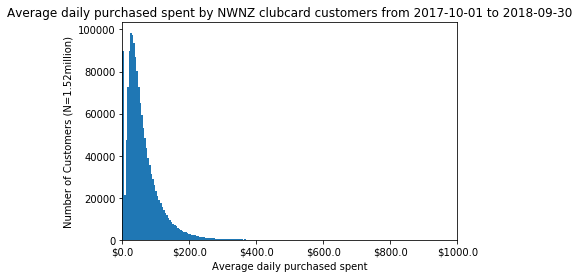

In [15]:
# Looking the rfm frequency distribution
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.xlim([0,1000])

ax = training['monetary_value'].plot(kind='hist', bins=1000)

formatter = ticker.FormatStrFormatter('$%0.1f') #declaring the formatter with the $ sign and y_values with 1 decimalplace
ax.xaxis.set_major_formatter(formatter)

plt.ylabel('Number of Customers (N=1.52million)')
plt.xlabel('Average daily purchased spent')
plt.title('Average daily purchased spent by NWNZ clubcard customers from 2017-10-01 to 2018-09-30')

Text(0.5,1,'Numbers of repeated purchase for NWNZ clubcard customers from Oct 2017 to Sep 2018')

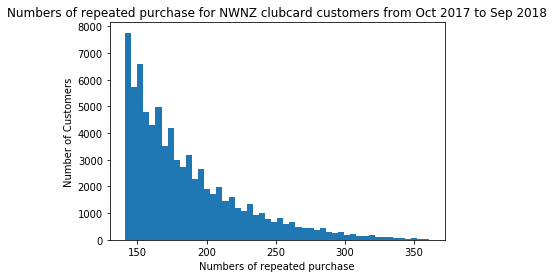

In [22]:
# Looking the rfm frequency distribution
import matplotlib.pyplot as plt
training[(training['frequency'] >= 141) &(training['frequency'] <= 361)]['frequency'].plot(kind='hist', bins=50)
plt.ylabel('Number of Customers (N=1.52million)')
plt.xlabel('Numbers of repeated purchase')
plt.title('Numbers of repeated purchase by NWNZ clubcard customers from 2017-10-01 to 2018-09-30')

Text(0.5,1,'Average daily purchased spent by NWNZ clubcard customers from 2017-10-01 to 2018-09-30')

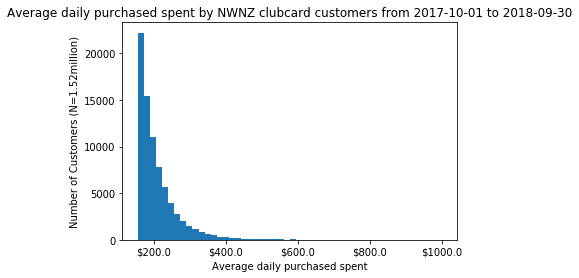

In [16]:
# Looking the rfm frequency distribution
import matplotlib.pyplot as plt
ax = training[(training['monetary_value'] >= 155) &(training['monetary_value'] <= 1000)]['monetary_value'].plot(kind='hist', bins=50)
formatter = ticker.FormatStrFormatter('$%0.1f') #declaring the formatter with the $ sign and y_values with 1 decimalplace
ax.xaxis.set_major_formatter(formatter)

plt.ylabel('Number of Customers (N=1.52million)')
plt.xlabel('Average daily purchased spent')
plt.title('Average daily purchased spent by NWNZ clubcard customers from 2017-10-01 to 2018-09-30')

In [9]:
training.describe()

,frequency,recency,T,monetary_value
count,1.529966e+06,1.529966e+06,1.529966e+06,1.529966e+06
mean,4.407936e+01,2.748608e+02,3.206574e+02,5.925528e+01
std,4.795064e+01,1.153469e+02,7.566388e+01,5.158008e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+00,2.260000e+02,3.200000e+02,2.630326e+01
50%,2.800000e+01,3.360000e+02,3.560000e+02,4.594736e+01
75%,6.400000e+01,3.570000e+02,3.620000e+02,7.801663e+01
max,3.610000e+02,3.640000e+02,3.640000e+02,4.670683e+03


In [44]:
training_describe = training.describe()[['frequency','monetary_value']]
training_describe.columns = ['Numbers of repeated purchase','Average daily purchased spent']
pd.options.display.float_format = '{:.5f}'.format
training_describe['Average daily purchased spent'] = training_describe['Average daily purchased spent'].map('${:,.2f}'.format)
training_describe

,Numbers of repeated purchase,Average daily purchased spent
count,1529966.00000,"$1,529,966.00"
mean,44.07936,$59.26
std,47.95064,$51.58
min,0.00000,$0.00
25%,8.00000,$26.30
50%,28.00000,$45.95
75%,64.00000,$78.02
max,361.00000,"$4,670.68"


In [3]:
# Delete the Outliers
training = training.loc[(training['frequency'] > 0) & (training['frequency'] <= 250)]

In [13]:
# Delete the Outliers
training_frequency_no_outlier = training.loc[(training['frequency'] > 0) & (training['frequency'] <= 250)]

In [14]:
training_frequency_no_outlier.count()

frequency         1437810
recency           1437810
T                 1437810
monetary_value    1437810
dtype: int64

In [59]:
1529966 - 1437810

92156

In [19]:
92156/1529966

0.06023401827230147

In [16]:
# Delete the Outliers
training_mv_no_outlier = training.loc[(training['monetary_value'] > 0) & (training['monetary_value'] <= 400)]

In [17]:
training_mv_no_outlier.count()

frequency         1443011
recency           1443011
T                 1443011
monetary_value    1443011
dtype: int64

In [18]:
1529966 - 1443011

86955

In [20]:
86955/1529966

0.05683459632436277

### Model

In [4]:
# Using the BG/NBD model
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.05)
bgf.fit(training['frequency'], training['recency'], training['T'])
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,1.003844,0.001022,1.001841,1.005846
alpha,7.110203,0.009399,7.091781,7.128626
a,0.017952,0.000065,0.017824,0.018079
b,0.470814,0.001640,0.467599,0.474029


### Customer Purchased prediction for next 1 year

In [12]:
#Predict for next 1 years = 365 days
training = training[training['frequency']>0]
t = 365
training['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, training['frequency'], training['recency'], training['T'])
training.head(5)

,frequency,recency,T,monetary_value,predicted_purchases
customer_id,,,,,
2100000000,95.0,363.0,363.0,95.270421,94.005762
2100000001,96.0,358.0,362.0,37.431458,95.207532
2100000002,2.0,181.0,204.0,13.785000,5.029940
2100000003,140.0,361.0,362.0,64.735357,138.445215
2100000004,184.0,358.0,360.0,20.968859,182.618879


In [13]:
training.loc[2101823123]

frequency               66.000000
recency                273.000000
T                      274.000000
monetary_value          43.864394
predicted_purchases     86.221604
Name: 2101823123, dtype: float64

In [14]:
test.loc[2101823123]

frequency         105.000000
recency           360.000000
T                 360.000000
monetary_value     64.484286
Name: 2101823123, dtype: float64

### Calibration dataset VS holdout dataset

In [26]:
training.columns = ['frequency_cal','recency_cal','T_cal','monetary_value_cal']
test.columns = ['frequency_holdout','recency_holdout','duration_holdout','monetary_value_holdout']
summary_cal_holdout = pd.concat([training[['frequency_cal','recency_cal','T_cal']],test[['frequency_holdout','duration_holdout']]], axis =1).dropna()

In [29]:
summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
customer_id,,,,,
2100000000,95.0,363.0,363.0,37.0,362.0
2100000001,96.0,358.0,362.0,77.0,353.0
2100000002,2.0,181.0,204.0,4.0,335.0
2100000003,140.0,361.0,362.0,143.0,364.0
2100000004,184.0,358.0,360.0,199.0,364.0


In [29]:
summary_cal_holdout.describe()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
count,1.372914e+06,1.372914e+06,1.372914e+06,1.372914e+06,1.372914e+06
mean,4.798478e+01,2.936078e+02,3.249456e+02,4.610974e+01,3.343859e+02
std,4.869010e+01,1.000031e+02,7.220270e+01,4.857796e+01,5.736147e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,2.740000e+02,3.290000e+02,9.000000e+00,3.380000e+02
50%,3.300000e+01,3.430000e+02,3.570000e+02,3.100000e+01,3.580000e+02
75%,6.900000e+01,3.580000e+02,3.620000e+02,6.700000e+01,3.620000e+02
max,3.610000e+02,3.640000e+02,3.640000e+02,3.620000e+02,3.640000e+02


In [30]:
summary_cal_holdout = summary_cal_holdout.query('frequency_cal <= 250')

C:\Python3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


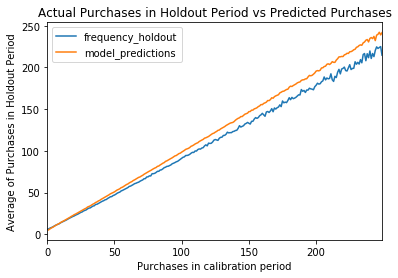

In [34]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
import matplotlib.pyplot as plt
bgf = BetaGeoFitter(penalizer_coef=0.05)
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
fig = plt.figure(figsize=(16,12))
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout, n=250)

# #Modified Graph  1 

In [35]:
training.columns = ['frequency_cal','recency_cal','T_cal','monetary_value_cal']
test.columns = ['Actual Repeated Purchases','recency_holdout','duration_holdout','monetary_value_holdout']
summary_cal_holdout = pd.concat([training[['frequency_cal','recency_cal','T_cal']],test[['Actual Repeated Purchases','duration_holdout']]], axis =1).dropna()

In [36]:
summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,Actual Repeated Purchases,duration_holdout
customer_id,,,,,
2100000000,95.0,363.0,363.0,37.0,362.0
2100000001,96.0,358.0,362.0,77.0,353.0
2100000002,2.0,181.0,204.0,4.0,335.0
2100000003,140.0,361.0,362.0,143.0,364.0
2100000004,184.0,358.0,360.0,199.0,364.0


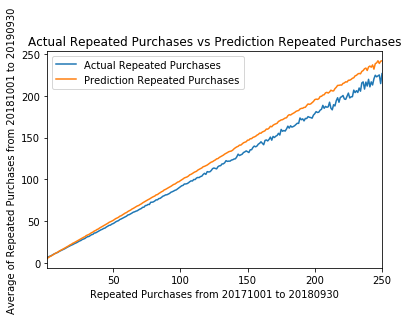

In [40]:
def plot_calibration_purchases_vs_holdout_purchases(
    model, calibration_holdout_matrix, kind="frequency_cal", n=7, **kwargs
):
    """
    Plot calibration purchases vs holdout.
    This currently relies too much on the lifetimes.util calibration_and_holdout_data function.
    Parameters
    ----------
    model: lifetimes model
        A fitted lifetimes model.
    calibration_holdout_matrix: pandas DataFrame
        DataFrame from calibration_and_holdout_data function.
    kind: str, optional
        x-axis :"frequency_cal". Purchases in calibration period,
                 "recency_cal". Age of customer at last purchase,
                 "T_cal". Age of customer at the end of calibration period,
                 "time_since_last_purchase". Time since user made last purchase
    n: int, optional
        Number of ticks on the x axis
    Returns
    -------
    axes: matplotlib.AxesSubplot
    """
    from matplotlib import pyplot as plt

    x_labels = {
        "frequency_cal": "Repeated Purchases from 20171001 to 20180930",
        "recency_cal": "Age of customer at last purchase",
        "T_cal": "Age of customer at the end of calibration period",
        "time_since_last_purchase": "Time since user made last purchase",
    }
    summary = calibration_holdout_matrix.copy()
    duration_holdout = summary.iloc[0]["duration_holdout"]

    summary["Prediction Repeated Purchases"] = model.conditional_expected_number_of_purchases_up_to_time(
            duration_holdout, summary["frequency_cal"], summary["recency_cal"], summary["T_cal"])

    if kind == "time_since_last_purchase":
        summary["time_since_last_purchase"] = summary["T_cal"] - summary["recency_cal"]
        ax = (
            summary.groupby(["time_since_last_purchase"])[["Actual Repeated Purchases", "Prediction Repeated Purchases"]]
            .mean()
            .iloc[:n]
            .plot(**kwargs)
        )
    else:
        ax = summary.groupby(kind)[["Actual Repeated Purchases", "Prediction Repeated Purchases"]].mean().iloc[:n].plot(**kwargs)

    plt.title("Actual Repeated Purchases vs Prediction Repeated Purchases")
    plt.xlabel(x_labels[kind])
    plt.ylabel("Average of Repeated Purchases from 20181001 to 20190930")
    plt.legend()

    return ax

import matplotlib.pyplot as plt
bgf = BetaGeoFitter(penalizer_coef=0.05)
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
fig = plt.figure(figsize=(16,12))
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout, n=250)

### Prediction Error

In [35]:
summary_cal_holdout = summary_cal_holdout[summary_cal_holdout['frequency_cal']>0]
t = 365
summary_cal_holdout['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
holdout = summary_cal_holdout['frequency_holdout'].sum(axis = 0)
prediction = summary_cal_holdout['predicted_purchases'].sum(axis = 0)
(prediction-holdout)/holdout

0.08460151246276497

8.4% Prediction error

In [37]:
prediction

66597426.58204902

In [38]:
holdout

61402668.0

In [40]:
test.sum()

frequency         6.513195e+07
recency           4.151724e+08
T                 4.855186e+08
monetary_value    9.105254e+07
dtype: float64

# 2. Predicting the customer probability alive (not churn)

In [77]:
# Using the BG/NBD model
bgf = BetaGeoFitter(penalizer_coef=0.05)
bgf.fit(training['frequency'], training['recency'], training['T'])
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.989013,0.001004,0.987045,0.990981
alpha,6.863591,0.009077,6.845800,6.881382
a,0.017747,0.000064,0.017621,0.017874
b,0.469311,0.001636,0.466104,0.472518


In [78]:
#Predict that customers still alive on the date of 2019-09-30
test_probability_alive = test[test['frequency']>0]
test_probability_alive['P(Alive)'] = bgf.conditional_probability_alive(test_probability_alive['frequency'], test_probability_alive['recency'], test_probability_alive['T'])
test_probability_alive.head(5)

,frequency,recency,T,monetary_value,P(Alive)
customer_id,,,,,
2100000000,37.0,311.0,362.0,134.787838,0.878152
2100000001,77.0,347.0,353.0,31.061558,0.999139
2100000002,4.0,309.0,335.0,29.300000,0.992467
2100000003,143.0,357.0,364.0,59.866783,0.998067
2100000004,199.0,364.0,364.0,19.970553,0.999911


In [52]:
test_probability_alive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407310 entries, 2100000000 to 2102081148
Data columns (total 5 columns):
frequency         1407310 non-null float64
recency           1407310 non-null float64
T                 1407310 non-null float64
monetary_value    1407310 non-null float64
P(Alive)          1407310 non-null float64
dtypes: float64(5)
memory usage: 104.4 MB


In [27]:
# Change scitific number to round 
aa = test_probability_alive.reset_index('customer_id')[['customer_id','P(Alive)']]
aa['Alive'] = round(aa['P(Alive)'], 2)
aa = aa.groupby('Alive').nunique()
aa = aa[['customer_id','P(Alive)']].reset_index()

In [170]:
aa.sort_values('Alive', ascending= False)[['Alive','customer_id']]

,Alive,customer_id
100,1.00,926978
99,0.99,146102
98,0.98,48142
97,0.97,24669
96,0.96,21237
95,0.95,15100
94,0.94,11704
93,0.93,9341
92,0.92,7764
91,0.91,6588


Text(0.5,1,'Customer Probability of Churn Distributaion')

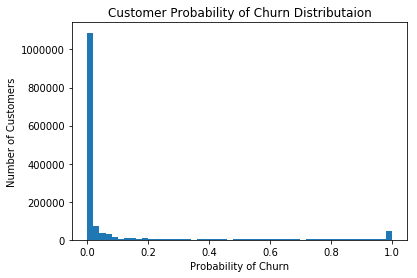

In [34]:
# Distribution for the pobability of alive 
%matplotlib inline
import matplotlib.pyplot as plt
(1-bb['Alive']).plot(kind='hist', bins=50)
plt.ylabel('Number of Customers')
plt.xlabel('Probability of Churn')
plt.title('Customer Probability of Churn Distributaion')

In [150]:
bb = test_probability_alive.reset_index('customer_id')[['customer_id','P(Alive)']]
bb['Alive'] = round(bb['P(Alive)'], 2)

In [153]:
bb.head()

,customer_id,P(Alive),Alive
0,2100000000,0.877182,0.88
1,2100000001,0.999131,1.00
2,2100000002,0.992381,0.99
3,2100000003,0.998049,1.00
4,2100000004,0.999910,1.00


In [186]:
test.loc[2101823123]

frequency         105.000000
recency           360.000000
T                 360.000000
monetary_value     64.484286
Name: 2101823123, dtype: float64

In [185]:
training.loc[2101823123]

frequency          66.000000
recency           273.000000
T                 274.000000
monetary_value     43.864394
Name: 2101823123, dtype: float64

In [191]:
test_probability_alive.head()

,frequency,recency,T,monetary_value,P(Alive)
customer_id,,,,,
2100000000,37.0,311.0,362.0,134.787838,0.877182
2100000001,77.0,347.0,353.0,31.061558,0.999131
2100000002,4.0,309.0,335.0,29.300000,0.992381
2100000003,143.0,357.0,364.0,59.866783,0.998049
2100000004,199.0,364.0,364.0,19.970553,0.999910


In [192]:
# Sort the P(Alive)
test_probability_alive.loc[2101823123]

frequency         105.000000
recency           360.000000
T                 360.000000
monetary_value     64.484286
P(Alive)            0.999828
Name: 2101823123, dtype: float64

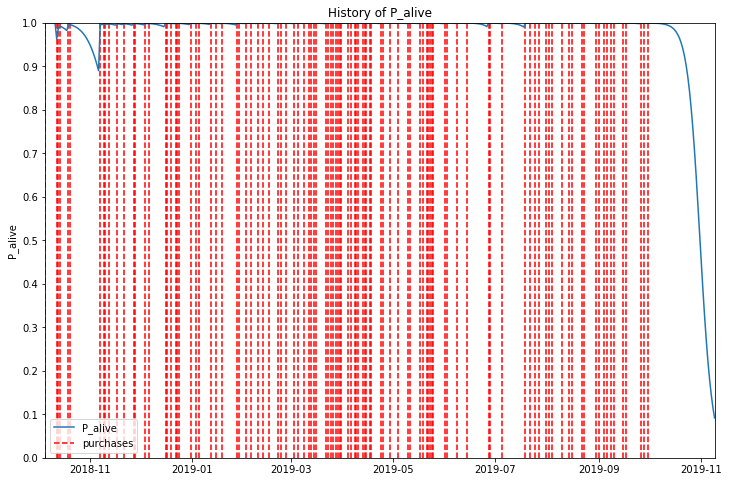

In [189]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt
data['date'] = pd.to_datetime(data.date, format="%Y%m%d")
data_test = data[data['date'] >= '2018-10-01']
fig = plt.figure(figsize=(12,8))
id = 2101823123
days_since_birth = 400
sp_trans = data_test.loc[data_test['customer_id'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'date')

# # Modified Graph  2

In [12]:
RFM_Customer = pd.read_csv('CHURN_RFM_CUSTOMER.csv')
bb = test_probability_alive.reset_index('customer_id')[['customer_id','P(Alive)']]
bb['Churn'] = round(1-bb['P(Alive)'], 2)
RFM_Customer_Alive = pd.merge(bb, RFM_Customer, how='inner', left_on = 'customer_id', right_on = 'BUSINESS_PARTNER_ID')
RFM_Customer_Alive.head()

,customer_id,P(Alive),Churn,BUSINESS_PARTNER_ID,LOYALTY_GROUP_MD
0,2100000000,0.877127,0.12,2100000000,Unassigned
1,2100000001,0.999130,0.00,2100000001,Habitual
2,2100000002,0.992377,0.01,2100000002,Irregular
3,2100000003,0.998048,0.00,2100000003,VIP
4,2100000004,0.999910,0.00,2100000004,Habitual


## VIP

In [15]:
RFM_Customer_Alive_VIP = RFM_Customer_Alive[RFM_Customer_Alive['LOYALTY_GROUP_MD'] == 'VIP']

In [21]:
safe = RFM_Customer_Alive_VIP[(RFM_Customer_Alive_VIP['Churn'] >=0) & (RFM_Customer_Alive_VIP['Churn'] <= 0.05)].count()/RFM_Customer_Alive_VIP.count()

In [24]:
Waving = RFM_Customer_Alive_VIP[(RFM_Customer_Alive_VIP['Churn'] >0.05) & (RFM_Customer_Alive_VIP['Churn'] <= 0.2)].count()/RFM_Customer_Alive_VIP.count()
Waving

customer_id            0.001502
P(Alive)               0.001502
Churn                  0.001502
BUSINESS_PARTNER_ID    0.001502
LOYALTY_GROUP_MD       0.001502
dtype: float64

In [25]:
Accelerated_Churn = RFM_Customer_Alive_VIP[(RFM_Customer_Alive_VIP['Churn'] >0.2) & (RFM_Customer_Alive_VIP['Churn'] <= 0.5)].count()/RFM_Customer_Alive_VIP.count()
Accelerated_Churn

customer_id            0.000728
P(Alive)               0.000728
Churn                  0.000728
BUSINESS_PARTNER_ID    0.000728
LOYALTY_GROUP_MD       0.000728
dtype: float64

In [26]:
Churned = RFM_Customer_Alive_VIP[(RFM_Customer_Alive_VIP['Churn'] >0.5) & (RFM_Customer_Alive_VIP['Churn'] <= 1)].count()/RFM_Customer_Alive_VIP.count()
Churned

customer_id            0.001035
P(Alive)               0.001035
Churn                  0.001035
BUSINESS_PARTNER_ID    0.001035
LOYALTY_GROUP_MD       0.001035
dtype: float64

In [43]:
dataframe = {'Safe':[safe.customer_id],'Waving':[Waving.customer_id], 'Accelerated_Churn': [Accelerated_Churn.customer_id], 'Churned':[Churned.customer_id]}

In [58]:
vip_dataframe = pd.DataFrame(dataframe)
vip_dataframe

,Safe,Waving,Accelerated_Churn,Churned
0,0.996735,0.001502,0.000728,0.001035


In [60]:
vip_dataframe.rename(index={0: 'VIP'}, inplace= True)
vip_dataframe

,Safe,Waving,Accelerated_Churn,Churned
VIP,0.996735,0.001502,0.000728,0.001035


## Loyal

In [65]:
RFM_Customer_Alive_loyal = RFM_Customer_Alive[RFM_Customer_Alive['LOYALTY_GROUP_MD'] == 'Loyal']
safe = RFM_Customer_Alive_loyal[(RFM_Customer_Alive_loyal['Churn'] >=0) & (RFM_Customer_Alive_loyal['Churn'] <= 0.05)].count()/RFM_Customer_Alive_loyal.count()
Waving = RFM_Customer_Alive_loyal[(RFM_Customer_Alive_loyal['Churn'] >0.05) & (RFM_Customer_Alive_loyal['Churn'] <= 0.2)].count()/RFM_Customer_Alive_loyal.count()
Accelerated_Churn = RFM_Customer_Alive_loyal[(RFM_Customer_Alive_loyal['Churn'] >0.2) & (RFM_Customer_Alive_loyal['Churn'] <= 0.5)].count()/RFM_Customer_Alive_loyal.count()
Churned = RFM_Customer_Alive_loyal[(RFM_Customer_Alive_loyal['Churn'] >0.5) & (RFM_Customer_Alive_loyal['Churn'] <= 1)].count()/RFM_Customer_Alive_loyal.count()
dataframe = {'Safe':[safe.customer_id],'Waving':[Waving.customer_id], 'Accelerated_Churn': [Accelerated_Churn.customer_id], 'Churned':[Churned.customer_id]}

loyal_dataframe = pd.DataFrame(dataframe)
loyal_dataframe.rename(index={0: 'LOYAL'}, inplace= True)
loyal_dataframe

,Safe,Waving,Accelerated_Churn,Churned
LOYAL,0.996702,0.001694,0.000716,0.000888


### Habitual

In [69]:
RFM_Customer_Alive_Habitual = RFM_Customer_Alive[RFM_Customer_Alive['LOYALTY_GROUP_MD'] == 'Habitual']
safe = RFM_Customer_Alive_Habitual[(RFM_Customer_Alive_Habitual['Churn'] >=0) & (RFM_Customer_Alive_Habitual['Churn'] <= 0.05)].count()/RFM_Customer_Alive_Habitual.count()
Waving = RFM_Customer_Alive_Habitual[(RFM_Customer_Alive_Habitual['Churn'] >0.05) & (RFM_Customer_Alive_Habitual['Churn'] <= 0.2)].count()/RFM_Customer_Alive_Habitual.count()
Accelerated_Churn = RFM_Customer_Alive_Habitual[(RFM_Customer_Alive_Habitual['Churn'] >0.2) & (RFM_Customer_Alive_Habitual['Churn'] <= 0.5)].count()/RFM_Customer_Alive_Habitual.count()
Churned = RFM_Customer_Alive_Habitual[(RFM_Customer_Alive_Habitual['Churn'] >0.5) & (RFM_Customer_Alive_Habitual['Churn'] <= 1)].count()/RFM_Customer_Alive_Habitual.count()
dataframe = {'Safe':[safe.customer_id],'Waving':[Waving.customer_id], 'Accelerated_Churn': [Accelerated_Churn.customer_id], 'Churned':[Churned.customer_id]}

Habitual_dataframe = pd.DataFrame(dataframe)
Habitual_dataframe.rename(index={0: 'HABITUAL'}, inplace= True)
Habitual_dataframe

,Safe,Waving,Accelerated_Churn,Churned
HABITUAL,0.997391,0.001719,0.00052,0.000371


## Desirables

In [71]:
RFM_Customer_Alive_Desirables = RFM_Customer_Alive[RFM_Customer_Alive['LOYALTY_GROUP_MD'] == 'Desirables']
safe = RFM_Customer_Alive_Desirables[(RFM_Customer_Alive_Desirables['Churn'] >=0) & (RFM_Customer_Alive_Desirables['Churn'] <= 0.05)].count()/RFM_Customer_Alive_Desirables.count()
Waving = RFM_Customer_Alive_Desirables[(RFM_Customer_Alive_Desirables['Churn'] >0.05) & (RFM_Customer_Alive_Desirables['Churn'] <= 0.2)].count()/RFM_Customer_Alive_Desirables.count()
Accelerated_Churn = RFM_Customer_Alive_Desirables[(RFM_Customer_Alive_Desirables['Churn'] >0.2) & (RFM_Customer_Alive_Desirables['Churn'] <= 0.5)].count()/RFM_Customer_Alive_Desirables.count()
Churned = RFM_Customer_Alive_Desirables[(RFM_Customer_Alive_Desirables['Churn'] >0.5) & (RFM_Customer_Alive_Desirables['Churn'] <= 1)].count()/RFM_Customer_Alive_Desirables.count()
dataframe = {'Safe':[safe.customer_id],'Waving':[Waving.customer_id], 'Accelerated_Churn': [Accelerated_Churn.customer_id], 'Churned':[Churned.customer_id]}

Desirables_dataframe = pd.DataFrame(dataframe)
Desirables_dataframe.rename(index={0: 'DESIRABLES'}, inplace= True)
Desirables_dataframe

,Safe,Waving,Accelerated_Churn,Churned
DESIRABLES,0.933954,0.024651,0.011223,0.030172


## Others

In [78]:
RFM_Customer_Alive_Others = RFM_Customer_Alive[RFM_Customer_Alive['LOYALTY_GROUP_MD'].isin(['Irregular','Switchers','Casual / Top-Ups','Unassigned	'])]
safe = RFM_Customer_Alive_Others[(RFM_Customer_Alive_Others['Churn'] >=0) & (RFM_Customer_Alive_Others['Churn'] <= 0.05)].count()/RFM_Customer_Alive_Others.count()
Waving = RFM_Customer_Alive_Others[(RFM_Customer_Alive_Others['Churn'] >0.05) & (RFM_Customer_Alive_Others['Churn'] <= 0.2)].count()/RFM_Customer_Alive_Others.count()
Accelerated_Churn = RFM_Customer_Alive_Others[(RFM_Customer_Alive_Others['Churn'] >0.2) & (RFM_Customer_Alive_Others['Churn'] <= 0.5)].count()/RFM_Customer_Alive_Others.count()
Churned = RFM_Customer_Alive_Others[(RFM_Customer_Alive_Others['Churn'] >0.5) & (RFM_Customer_Alive_Others['Churn'] <= 1)].count()/RFM_Customer_Alive_Others.count()
dataframe = {'Safe':[safe.customer_id],'Waving':[Waving.customer_id], 'Accelerated_Churn': [Accelerated_Churn.customer_id], 'Churned':[Churned.customer_id]}

Others_dataframe = pd.DataFrame(dataframe)
Others_dataframe.rename(index={0: 'OTHERS'}, inplace= True)
Others_dataframe

,Safe,Waving,Accelerated_Churn,Churned
OTHERS,0.879689,0.055837,0.024883,0.03959


In [81]:
frames = [vip_dataframe, loyal_dataframe, Habitual_dataframe,Desirables_dataframe,Others_dataframe]
result = pd.concat(frames)
result

,Safe,Waving,Accelerated_Churn,Churned
VIP,0.996735,0.001502,0.000728,0.001035
LOYAL,0.996702,0.001694,0.000716,0.000888
HABITUAL,0.997391,0.001719,0.000520,0.000371
DESIRABLES,0.933954,0.024651,0.011223,0.030172
OTHERS,0.879689,0.055837,0.024883,0.039590


Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Probability of Churned by Loyalty Group')

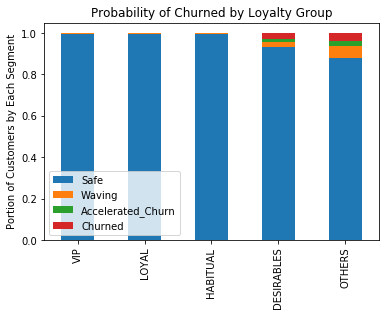

In [84]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

ax = result.plot(kind='bar', stacked=True)
plt.ylabel('Portion of Customers by Each Segment')
plt.title('Probability of Churned by Loyalty Group')


# 2.1 Probability of being alive analytics

## RFM Group Analytics for P(Alive) between 0~0.05 Safe Reverse to Churn not Alive

In [11]:
# Creating the table
RFM_Customer = pd.read_csv('CHURN_RFM_CUSTOMER.csv')
bb = test_probability_alive.reset_index('customer_id')[['customer_id','P(Alive)']]
bb['Churn'] = round(1-bb['P(Alive)'], 2)
RFM_Customer_Alive = pd.merge(bb, RFM_Customer, how='inner', left_on = 'customer_id', right_on = 'BUSINESS_PARTNER_ID')

a = RFM_Customer_Alive.groupby('LOYALTY_GROUP_MD').count()
b = RFM_Customer_Alive[(RFM_Customer_Alive['Churn'] >=0) & (RFM_Customer_Alive['Churn'] <= 0.05)].groupby('LOYALTY_GROUP_MD').count()
c =  pd.DataFrame(b/a)
c

,customer_id,P(Alive),Churn,BUSINESS_PARTNER_ID
LOYALTY_GROUP_MD,,,,
Casual / Top-Ups,0.950425,0.950425,0.950425,0.950425
Desirables,0.933954,0.933954,0.933954,0.933954
Habitual,0.997391,0.997391,0.997391,0.997391
Irregular,0.761897,0.761897,0.761897,0.761897
Loyal,0.996702,0.996702,0.996702,0.996702
Switchers,0.946613,0.946613,0.946613,0.946613
Unassigned,0.280622,0.280622,0.280622,0.280622
VIP,0.996735,0.996735,0.996735,0.996735


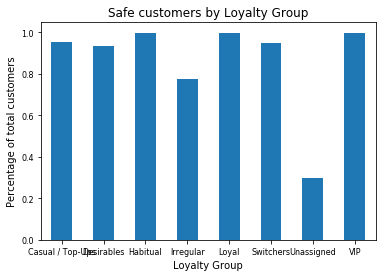

In [17]:
#From 0~0.05 Safe 
RFM_Customer_Alive_Safe = c

#from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
#figure(num=None, figsize=(300, 90), dpi=80, facecolor='w', edgecolor='k')
ax = RFM_Customer_Alive_Safe.reset_index('LOYALTY_GROUP_MD').plot.bar(x='LOYALTY_GROUP_MD', y='customer_id', rot=0, fontsize=8)
plt.ylabel('Percentage of total customers')
plt.xlabel('Loyalty Group')
plt.title('Safe customers by Loyalty Group')
ax.legend().set_visible(False)
plt.show()

## RFM Group Analytics for P(Alive) between 0.05~ 0.2 Waving

In [24]:
a = RFM_Customer_Alive.groupby('LOYALTY_GROUP_MD').count()
b = RFM_Customer_Alive[(RFM_Customer_Alive['Churn'] >0.05) & (RFM_Customer_Alive['Churn'] <= 0.2)].groupby('LOYALTY_GROUP_MD').count()
c =  pd.DataFrame(b/a)
c

,customer_id,P(Alive),Churn,BUSINESS_PARTNER_ID
LOYALTY_GROUP_MD,,,,
Casual / Top-Ups,0.023980,0.023980,0.023980,0.023980
Desirables,0.023663,0.023663,0.023663,0.023663
Habitual,0.001671,0.001671,0.001671,0.001671
Irregular,0.105546,0.105546,0.105546,0.105546
Loyal,0.001624,0.001624,0.001624,0.001624
Switchers,0.022039,0.022039,0.022039,0.022039
Unassigned,0.195070,0.195070,0.195070,0.195070
VIP,0.001510,0.001510,0.001510,0.001510


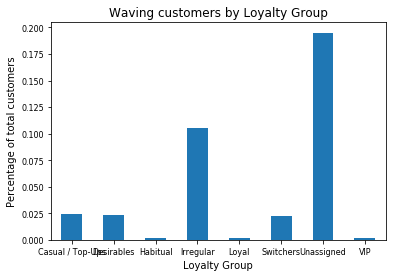

In [25]:
#From 0~0.05 Safe 
RFM_Customer_Alive_Safe = c

#from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
#figure(num=None, figsize=(300, 90), dpi=80, facecolor='w', edgecolor='k')
ax = RFM_Customer_Alive_Safe.reset_index('LOYALTY_GROUP_MD').plot.bar(x='LOYALTY_GROUP_MD', y='customer_id', rot=0, fontsize=8)
plt.ylabel('Percentage of total customers')
plt.xlabel('Loyalty Group')
plt.title('Waving customers by Loyalty Group')
ax.legend().set_visible(False)
plt.show()

## RFM Group Analytics for P(Alive) between 0.2~ 0.5 Accelerated Churn

In [26]:
a = RFM_Customer_Alive.groupby('LOYALTY_GROUP_MD').count()
b = RFM_Customer_Alive[(RFM_Customer_Alive['Churn'] >0.2) & (RFM_Customer_Alive['Churn'] <= 0.5)].groupby('LOYALTY_GROUP_MD').count()
c =  pd.DataFrame(b/a)
c

,customer_id,P(Alive),Churn,BUSINESS_PARTNER_ID
LOYALTY_GROUP_MD,,,,
Casual / Top-Ups,0.009036,0.009036,0.009036,0.009036
Desirables,0.011042,0.011042,0.011042,0.011042
Habitual,0.000481,0.000481,0.000481,0.000481
Irregular,0.047977,0.047977,0.047977,0.047977
Loyal,0.000701,0.000701,0.000701,0.000701
Switchers,0.010045,0.010045,0.010045,0.010045
Unassigned,0.127214,0.127214,0.127214,0.127214
VIP,0.000675,0.000675,0.000675,0.000675


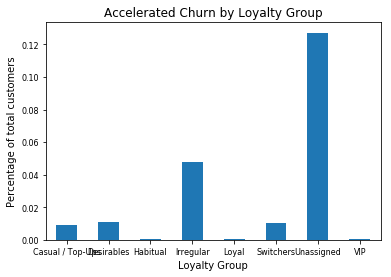

In [27]:
#From 0~0.05 Safe 
RFM_Customer_Alive_Safe = c

#from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
#figure(num=None, figsize=(300, 90), dpi=80, facecolor='w', edgecolor='k')
ax = RFM_Customer_Alive_Safe.reset_index('LOYALTY_GROUP_MD').plot.bar(x='LOYALTY_GROUP_MD', y='customer_id', rot=0, fontsize=8)
plt.ylabel('Percentage of total customers')
plt.xlabel('Loyalty Group')
plt.title('Accelerated Churn by Loyalty Group')
ax.legend().set_visible(False)
plt.show()

## RFM Group Analytics for P(Alive) between 0.5~ 1 Churned

In [22]:
a = RFM_Customer_Alive.groupby('LOYALTY_GROUP_MD').count()
b = RFM_Customer_Alive[(RFM_Customer_Alive['Churn'] >0.5) & (RFM_Customer_Alive['Churn'] <= 1)].groupby('LOYALTY_GROUP_MD').count()
c =  pd.DataFrame(b/a)
c

,customer_id,P(Alive),Churn,BUSINESS_PARTNER_ID
LOYALTY_GROUP_MD,,,,
Casual / Top-Ups,0.014521,0.014521,0.014521,0.014521
Desirables,0.029545,0.029545,0.029545,0.029545
Habitual,0.000361,0.000361,0.000361,0.000361
Irregular,0.073785,0.073785,0.073785,0.073785
Loyal,0.000867,0.000867,0.000867,0.000867
Switchers,0.019408,0.019408,0.019408,0.019408
Unassigned,0.380120,0.380120,0.380120,0.380120
VIP,0.001019,0.001019,0.001019,0.001019


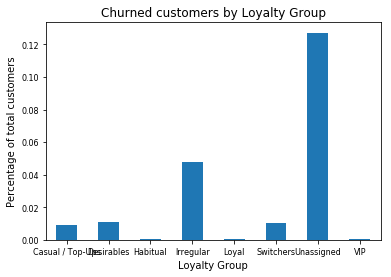

In [28]:
#From 0~0.05 Safe 
RFM_Customer_Alive_Safe = c

#from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
#figure(num=None, figsize=(300, 90), dpi=80, facecolor='w', edgecolor='k')
ax = RFM_Customer_Alive_Safe.reset_index('LOYALTY_GROUP_MD').plot.bar(x='LOYALTY_GROUP_MD', y='customer_id', rot=0, fontsize=8)
plt.ylabel('Percentage of total customers')
plt.xlabel('Loyalty Group')
plt.title('Churned customers by Loyalty Group')
ax.legend().set_visible(False)
plt.show()

## 2.2 plot_history_alive the function in Python how it calculate

# # #Modified Graph  3

In [1]:
from lifetimes.utils import calculate_alive_path
def plot_history_alive(model, t, transactions, datetime_col, freq="D", start_date=None, ax=None, **kwargs):
    """
    Draw a graph showing the probability of being alive for a customer in time.
    Parameters
    ----------
    model: lifetimes model
        A fitted lifetimes model.
    t: int
        the number of time units since the birth we want to draw the p_alive
    transactions: pandas DataFrame
        DataFrame containing the transactions history of the customer_id
    datetime_col: str
        The column in the transactions that denotes the datetime the purchase was made
    freq: str, optional
        Default 'D' for days. Other examples= 'W' for weekly
    start_date: datetime, optional
        Limit xaxis to start date
    ax: matplotlib.AxesSubplot, optional
        Using user axes
    kwargs
        Passed into the matplotlib.pyplot.plot command.
    Returns
    -------
    axes: matplotlib.AxesSubplot
    """
    from matplotlib import pyplot as plt

    if start_date is None:
        start_date = min(transactions[datetime_col])

    if ax is None:
        ax = plt.subplot(111)

    # Get purchasing history of user
    customer_history = transactions[[datetime_col]].copy()
    customer_history.index = pd.DatetimeIndex(customer_history[datetime_col])

    # Add transactions column
    customer_history["transactions"] = 1
    customer_history = customer_history.resample(freq).sum()

    # plot alive_path
    path = calculate_alive_path(model, transactions, datetime_col, t, freq)
    path = 1 - path
    path_dates = pd.date_range(start=min(transactions[datetime_col]), periods=len(path), freq=freq)
    plt.plot(path_dates, path, "-", label="P_churn")

    # plot buying dates
    payment_dates = customer_history[customer_history["transactions"] >= 1].index
    plt.vlines(payment_dates.values, ymin=0, ymax=1, colors="r", linestyles="dashed", label="purchases")

    plt.ylim(0, 1.0)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlim(start_date, path_dates[-1])
    plt.legend(loc=3)
    plt.ylabel("P_churn")
    plt.title("History of P_churn")

    return ax

import matplotlib.pyplot as plt
data['date'] = pd.to_datetime(data.date, format="%Y%m%d")
data_test = data[data['date'] >= '2018-03-01']
fig = plt.figure(figsize=(12,8))
id = 2100000002
days_since_birth = 300
sp_trans = data_test.loc[data_test['customer_id'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'date')

AttributeError: module 'scipy.misc' has no attribute 'logsumexp'

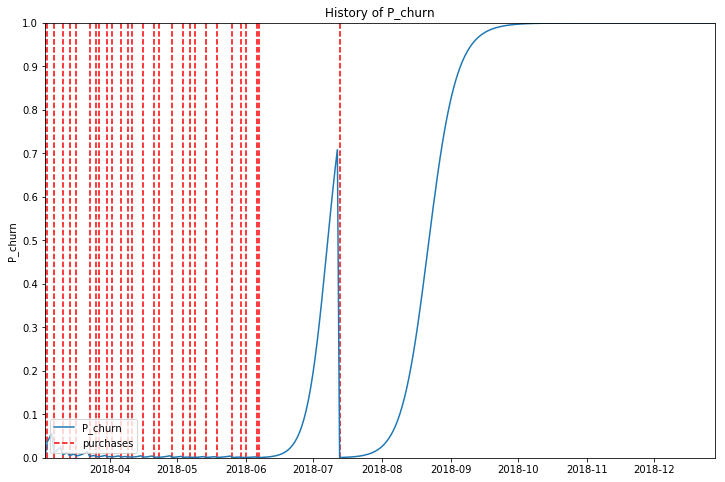

In [89]:
from lifetimes.utils import calculate_alive_path
def plot_history_alive(model, t, transactions, datetime_col, freq="D", start_date=None, ax=None, **kwargs):
    """
    Draw a graph showing the probability of being alive for a customer in time.
    Parameters
    ----------
    model: lifetimes model
        A fitted lifetimes model.
    t: int
        the number of time units since the birth we want to draw the p_alive
    transactions: pandas DataFrame
        DataFrame containing the transactions history of the customer_id
    datetime_col: str
        The column in the transactions that denotes the datetime the purchase was made
    freq: str, optional
        Default 'D' for days. Other examples= 'W' for weekly
    start_date: datetime, optional
        Limit xaxis to start date
    ax: matplotlib.AxesSubplot, optional
        Using user axes
    kwargs
        Passed into the matplotlib.pyplot.plot command.
    Returns
    -------
    axes: matplotlib.AxesSubplot
    """
    from matplotlib import pyplot as plt

    if start_date is None:
        start_date = min(transactions[datetime_col])

    if ax is None:
        ax = plt.subplot(111)

    # Get purchasing history of user
    customer_history = transactions[[datetime_col]].copy()
    customer_history.index = pd.DatetimeIndex(customer_history[datetime_col])

    # Add transactions column
    customer_history["transactions"] = 1
    customer_history = customer_history.resample(freq).sum()

    # plot alive_path
    path = calculate_alive_path(model, transactions, datetime_col, t, freq)
    path = 1 - path
    path_dates = pd.date_range(start=min(transactions[datetime_col]), periods=len(path), freq=freq)
    plt.plot(path_dates, path, "-", label="P_churn")

    # plot buying dates
    payment_dates = customer_history[customer_history["transactions"] >= 1].index
    plt.vlines(payment_dates.values, ymin=0, ymax=1, colors="r", linestyles="dashed", label="purchases")

    plt.ylim(0, 1.0)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlim(start_date, path_dates[-1])
    plt.legend(loc=3)
    plt.ylabel("P_churn")
    plt.title("History of P_churn")

    return ax



import matplotlib.pyplot as plt
data['date'] = pd.to_datetime(data.date, format="%Y%m%d")
data_test = data[data['date'] >= '2018-03-01']
fig = plt.figure(figsize=(12,8))
id = 2100002272
days_since_birth = 300
sp_trans = data_test.loc[data_test['customer_id'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'date')

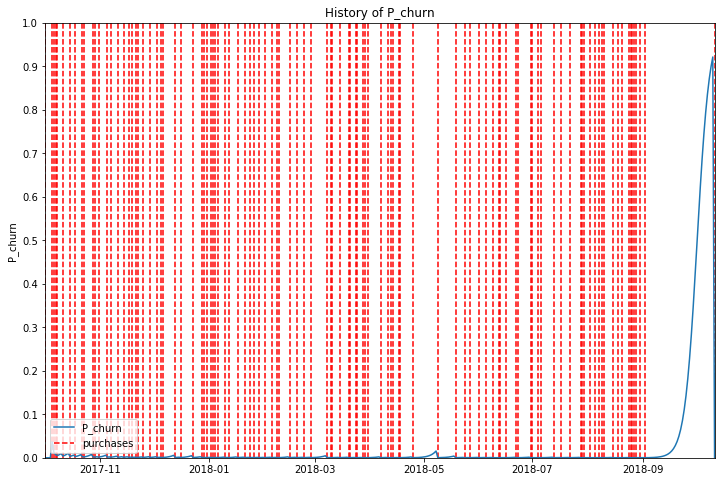

In [107]:


from lifetimes.utils import calculate_alive_path
def plot_history_alive(model, t, transactions, datetime_col, freq="D", start_date=None, ax=None, **kwargs):
    """
    Draw a graph showing the probability of being alive for a customer in time.
    Parameters
    ----------
    model: lifetimes model
        A fitted lifetimes model.
    t: int
        the number of time units since the birth we want to draw the p_alive
    transactions: pandas DataFrame
        DataFrame containing the transactions history of the customer_id
    datetime_col: str
        The column in the transactions that denotes the datetime the purchase was made
    freq: str, optional
        Default 'D' for days. Other examples= 'W' for weekly
    start_date: datetime, optional
        Limit xaxis to start date
    ax: matplotlib.AxesSubplot, optional
        Using user axes
    kwargs
        Passed into the matplotlib.pyplot.plot command.
    Returns
    -------
    axes: matplotlib.AxesSubplot
    """
    from matplotlib import pyplot as plt

    if start_date is None:
        start_date = min(transactions[datetime_col])

    if ax is None:
        ax = plt.subplot(111)

    # Get purchasing history of user
    customer_history = transactions[[datetime_col]].copy()
    customer_history.index = pd.DatetimeIndex(customer_history[datetime_col])

    # Add transactions column
    customer_history["transactions"] = 1
    customer_history = customer_history.resample(freq).sum()

    # plot alive_path
    path = calculate_alive_path(model, transactions, datetime_col, t, freq)
    path = 1 - path
    path_dates = pd.date_range(start=min(transactions[datetime_col]), periods=len(path), freq=freq)
    plt.plot(path_dates, path, "-", label="P_churn")

    # plot buying dates
    payment_dates = customer_history[customer_history["transactions"] >= 1].index
    plt.vlines(payment_dates.values, ymin=0, ymax=1, colors="r", linestyles="dashed", label="purchases")

    plt.ylim(0, 1.0)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlim(start_date, path_dates[-1])
    plt.legend(loc=3)
    plt.ylabel("P_churn")
    plt.title("History of P_churn")

    return ax



import matplotlib.pyplot as plt
data['date'] = pd.to_datetime(data.date, format="%Y%m%d")
data_test = data[(data['date'] >= '2017-10-01') &(data['date'] <= '2018-10-11')]
fig = plt.figure(figsize=(12,8))
id = 2101275685
days_since_birth = 300
sp_trans = data_test.loc[data_test['customer_id'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'date')

# ## # #Modified Graph  4

In [109]:
a = {'Repeated Purchase': [1.000000,0.0014694],'Average Daily Spent': [0.0014694, 1.000000]}

In [110]:
a_dataframe = pd.DataFrame(a)

In [112]:
a_dataframe.rename(index = {0:'Repeated Purchase',1:'Average Daily Spent'},inplace=True)

In [113]:
a_dataframe

,Repeated Purchase,Average Daily Spent
Repeated Purchase,1.000000,0.001469
Average Daily Spent,0.001469,1.000000


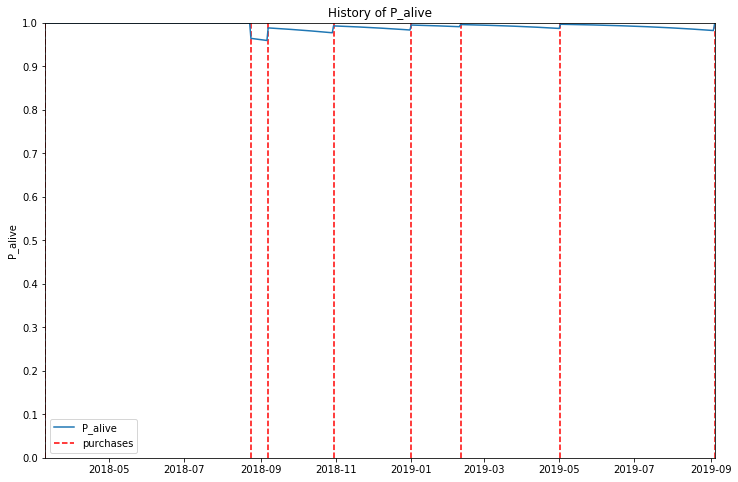

In [97]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt
data['date'] = pd.to_datetime(data.da+te, format="%Y%m%d")
data_test = data[data['date'] >= '2018-03-01']
fig = plt.figure(figsize=(12,8))
id = 2100000002
days_since_birth = 300
sp_trans = data_test.loc[data_test['customer_id'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'date')

In [7]:
from lifetimes.utils import calculate_alive_path

data['date'] = pd.to_datetime(data.date, format="%Y%m%d")
data_test = data[data['date'] >= '2018-05-01']
id = 2100000002
days_since_birth = 300
sp_trans = data_test.loc[data_test['customer_id'] == id]
alive_path = pd.DataFrame(calculate_alive_path(bgf, sp_trans, 'date', days_since_birth, freq='D'))
#alive_path.to_csv('alive_path.csv')

In [11]:
alive_path.head()

,0
0,[1.0]
1,[1.0]
2,[1.0]
3,[1.0]
4,[1.0]


In [76]:
sp_trans.head()

,customer_id,date,quantity,amount
41810282,2100000002,2019-05-02,6,22.35
66913278,2100000002,2018-08-24,1,19.99
87416943,2100000002,2018-09-07,2,7.58
101572246,2100000002,2019-01-01,5,19.16
103963628,2100000002,2018-10-30,11,25.91


###### Build the customer_history dataframe

In [77]:
    customer_history = sp_trans[['date']].copy()
    customer_history['date'] = pd.to_datetime(customer_history['date'])
    customer_history = customer_history.set_index('date')
    # Add transactions column
    customer_history["transactions"] = 1

In [84]:
customer_history

,transactions
date,
2019-05-02,1
2018-08-24,1
2018-09-07,1
2019-01-01,1
2018-10-30,1
2019-02-10,1
2019-09-04,1


In [83]:
purchase_history = customer_history.resample('D').sum().replace(np.nan, 0)["transactions"].values
purchase_history

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [86]:
t=300
extra_columns = t + 1 - len(purchase_history)
extra_columns

-76

In [88]:
customer_history = pd.DataFrame(np.append(purchase_history, [0] * extra_columns), columns=["transactions"])
customer_history.head()

,transactions
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [89]:
# add T column
customer_history["T"] = np.arange(customer_history.shape[0])

In [90]:
customer_history.head()

,transactions,T
0,1.0,0
1,0.0,1
2,0.0,2
3,0.0,3
4,0.0,4


In [91]:
    # add cumulative transactions column
    customer_history["transactions"] = customer_history["transactions"].apply(lambda t: int(t > 0))
    customer_history["frequency"] = customer_history["transactions"].cumsum() - 1  # first purchase is ignored

In [92]:
customer_history.head()

,transactions,T,frequency
0,1,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0


In [93]:
    # Add t_x column
    customer_history["recency"] = customer_history.apply(
        lambda row: row["T"] if row["transactions"] != 0 else np.nan, axis=1
    )
    customer_history["recency"] = customer_history["recency"].fillna(method="ffill").fillna(0)

In [95]:
customer_history

,transactions,T,frequency,recency
0,1,0,0,0.0
1,0,1,0,0.0
2,0,2,0,0.0
3,0,3,0,0.0
4,0,4,0,0.0
5,0,5,0,0.0
6,0,6,0,0.0
7,0,7,0,0.0
8,0,8,0,0.0
9,0,9,0,0.0


In [101]:
# Got the T, frequency, recency for this customers, total there are 7 times during the past.
customer_history[customer_history['transactions']==1]

,transactions,T,frequency,recency
0,1,0,0,0.0
14,1,14,1,14.0
67,1,67,2,67.0
130,1,130,3,130.0
170,1,170,4,170.0
251,1,251,5,251.0
376,1,376,6,376.0


In [121]:
# Applied the Conditional_probability_alive formula and predict the probability of being alive for the first repeated purchased 
from scipy.special import expit
r = 0.818760
alpha = 6.007067
a = 0.016930
b = 0.459421

frequency = 1
recency = 14
T = 14

log_div = (r + frequency) * np.log((alpha + T) / (alpha + recency)) + np.log(a / (b + np.maximum(frequency, 1) - 1))
np.atleast_1d(np.where(frequency == 0, 1.0, expit(-log_div)))

array([0.96445898])

In [114]:
np.log(a / (b + np.maximum(frequency, 1) - 1))

-3.3008798048631993

In [123]:
# Applied the Conditional_probability_alive formula and predict the probability of being alive for the second repeated purchased 
from scipy.special import expit
r = 0.818760
alpha = 6.007067
a = 0.016930
b = 0.459421

frequency = 2
recency = 67
T = 67

log_div = (r + frequency) * np.log((alpha + T) / (alpha + recency)) + np.log(a / (b + np.maximum(frequency, 1) - 1))
np.atleast_1d(np.where(frequency == 0, 1.0, expit(-log_div)))

array([0.98853254])

In [116]:
np.log(a / (b + np.maximum(frequency, 1) - 1))

-4.456707864558075

In [125]:
# Applied the Conditional_probability_alive formula and predict the probability of being alive for the last repeated purchased 
from scipy.special import expit
r = 0.818760
alpha = 6.007067
a = 0.016930
b = 0.459421

frequency = 6
recency = 376
T = 376

log_div = (r + frequency) * np.log((alpha + T) / (alpha + recency)) + np.log(a / (b + np.maximum(frequency, 1) - 1))
np.atleast_1d(np.where(frequency == 0, 1.0, expit(-log_div)))

array([0.99690853])

In [127]:
np.log(a / (b + 5))

-5.776010823014805

# 2.3Customer Probability of being Alive Path

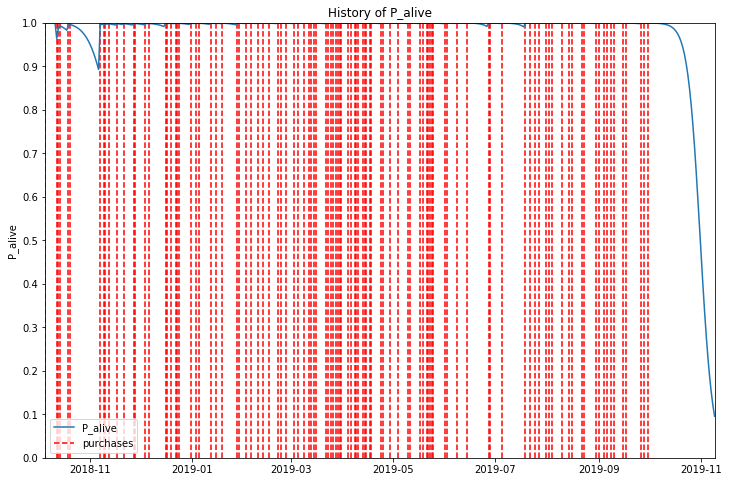

In [18]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt
data['date'] = pd.to_datetime(data.date, format="%Y%m%d")
data_test = data[data['date'] >= '2018-10-01']
fig = plt.figure(figsize=(12,8))
id = 2101823123
days_since_birth = 400
sp_trans = data_test.loc[data_test['customer_id'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'date')

In [17]:
from lifetimes.utils import calculate_alive_path

data['date'] = pd.to_datetime(data.date, format="%Y%m%d")
data_test = data[data['date'] >= '2018-10-01']
id = 2101823123
days_since_birth = 400
sp_trans = data_test.loc[data_test['customer_id'] == id]
pd.DataFrame(calculate_alive_path(bgf, sp_trans, 'date', days_since_birth, freq='D'))

,0
0,[1.0]
1,[1.0]
2,[1.0]
3,[1.0]
4,[1.0]
5,[1.0]
6,[1.0]
7,[0.9644587675536247]
8,[0.9885324602814257]
9,[0.9931632809479323]


## 2.4 How to choose the date range for prediction? 

In [6]:
data.head()

,customer_id,date,quantity,amount
0,2100395099,20171026,17,38.80
1,2100068562,20171012,36,137.25
2,2100006589,20171009,22,91.02
3,2100628482,20180102,8,57.28
4,2100618183,20180111,12,93.47


In [17]:
date_range = data[(data['date'] >= 20181001) &(data['date'] <= 20190930)]
date_range['date'] = pd.to_datetime(date_range.date, format="%Y%m%d")

In [18]:
min=pd.DataFrame(date_range.groupby('customer_id')['date'].min())

In [19]:
max=pd.DataFrame(date_range.groupby('customer_id')['date'].max())

In [20]:
min_max = pd.concat([min,max], axis=1)

In [21]:
min_max['Date_Range'] = min_max.iloc[:,1] - min_max.iloc[:,0]

In [22]:
min_max.columns = ['min_date','max_date','date_range']

In [23]:
min_max['date_range'] = min_max['date_range'].dt.days

In [24]:
min_max.head()

,min_date,max_date,date_range
customer_id,,,
2100000000,2018-10-03,2019-08-10,311
2100000001,2018-10-12,2019-09-24,347
2100000002,2018-10-30,2019-09-04,309
2100000003,2018-10-01,2019-09-23,357
2100000004,2018-10-01,2019-09-30,364


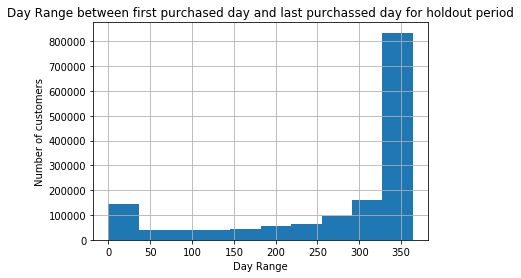

In [35]:
import matplotlib.pyplot as plt
ax = min_max['date_range'].hist()
plt.ylabel('Number of customers')
plt.xlabel('Day Range')
plt.title('Day Range between first purchased day and last purchassed day for holdout period')
#ax.legend().set_visible(False)
plt.show()

# 3. Predicting the customer average daily spend 

### Delte Outliers

In [4]:
#Delete the outlier
lower_bound = 0.1
upper_bound = 0.95
training.frequency.quantile([lower_bound,upper_bound])

0.10      2.0
0.95    141.0
Name: frequency, dtype: float64

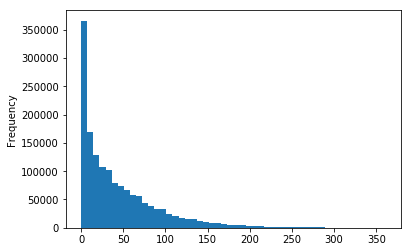

In [5]:
# Looking the rfm frequency distribution
%matplotlib inline
training['frequency'].plot(kind='hist', bins=50)

Text(0.5,1,'Customer Frequency Distribution')

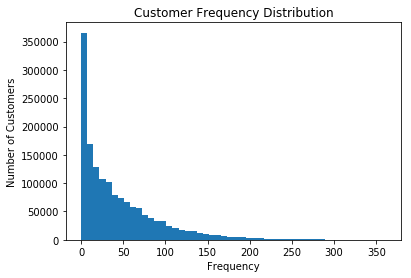

In [6]:
# Looking the rfm frequency distribution
%matplotlib inline
import matplotlib.pyplot as plt
training['frequency'].plot(kind='hist', bins=50)
plt.ylabel('Number of Customers')
plt.xlabel('Frequency')
plt.title('Customer Frequency Distribution')

Text(0.5,1,'Customer Monetary value Distribution')

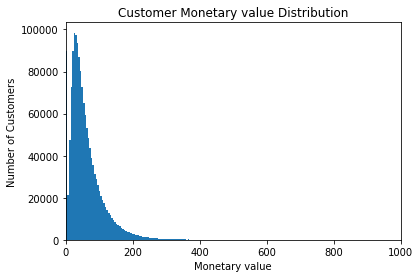

In [7]:
# Looking the rfm frequency distribution
import matplotlib.pyplot as plt
plt.xlim([0,1000])
training['monetary_value'].plot(kind='hist', bins=1000)
plt.ylabel('Number of Customers')
plt.xlabel('Monetary value')
plt.title('Customer Monetary value Distribution')

In [8]:
#Delete the outlier
lower_bound = 0.1
upper_bound = 0.99
training.monetary_value.quantile([lower_bound,upper_bound])

0.10     13.583703
0.99    238.633865
Name: monetary_value, dtype: float64

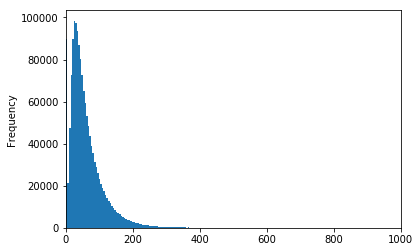

In [9]:
# Looking the rfm frequency distribution
import matplotlib.pyplot as plt
plt.xlim([0,1000])
training['monetary_value'].plot(kind='hist', bins=1000)

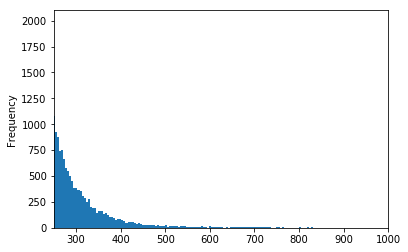

In [10]:
# Looking the rfm frequency distribution
import matplotlib.pyplot as plt
plt.xlim([250,1000])
plt.ylim([0,2100])
training['monetary_value'].plot(kind='hist', bins=1000)

In [55]:
# delete the outlier
training = training.loc[(training['frequency'] > 0) & (training['frequency'] < 250)& (training['monetary_value'] <= 400)]

In [56]:
training[['frequency', 'monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.014694
monetary_value,0.014694,1.000000


### Building Model

In [57]:
# refit the BG model to the summary_with_money_value dataset
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.08)
bgf.fit(training['frequency'], training['recency'], training['T'])
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.927490,0.000908,0.925710,0.929271
alpha,6.571873,0.008645,6.554929,6.588817
a,0.016058,0.000059,0.015942,0.016174
b,0.392133,0.001309,0.389567,0.394699


In [58]:
# Build the model
training = training[training['frequency']>0]
training = training[training['monetary_value']>0]

from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0.01)
ggf.fit(training['frequency'],
        training['monetary_value'])
print(ggf.summary)

       coef  se(coef)  lower 95% bound  upper 95% bound
p  3.906088  0.004008         3.898232         3.913945
q  0.714975  0.000718         0.713568         0.716382
v  3.873013  0.004034         3.865106         3.880919


In [59]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        training['frequency'],
        training['monetary_value']
    ).mean(),
    training[training['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 63.31318311836954, Average profit: 62.382159180408294


In [60]:
training_predict = ggf.conditional_expected_average_profit(
        training['frequency'],
        training['monetary_value'])

In [61]:
training_actual = training['monetary_value']

In [62]:
training_predict_actual = pd.concat([training_actual,training_predict],axis =1)

In [63]:
# Rename the column name
training_predict_actual.columns = ['Actual', 'Predict']

In [64]:
training_predict_actual['difference'] = (training_predict_actual['Predict']-training_predict_actual['Actual'])/training_predict_actual['Actual']*100

In [65]:
training_predict_actual.head()

,Actual,Predict,difference
customer_id,,,
2100000000,95.270421,95.384454,0.119694
2100000001,37.431458,37.500306,0.183930
2100000002,13.785000,16.316822,18.366496
2100000003,64.735357,64.796794,0.094905
2100000004,20.968859,20.998235,0.140095


In [66]:
training_predict_actual.describe()

,Actual,Predict,difference
count,1.436304e+06,1.436304e+06,1.436304e+06
mean,6.238216e+01,6.331318e+01,2.730671e+00
std,4.799044e+01,4.841056e+01,9.675094e+00
min,3.900000e-01,1.118984e+00,3.435089e-02
25%,2.932000e+01,3.002384e+01,2.182223e-01
50%,4.858143e+01,4.930535e+01,5.193153e-01
75%,8.073091e+01,8.159266e+01,1.676694e+00
max,4.000000e+02,4.356631e+02,1.079120e+03


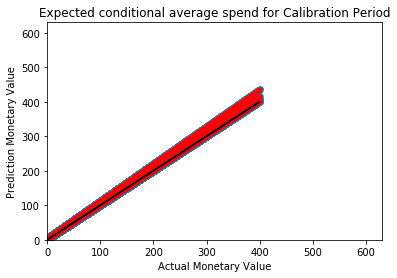

In [68]:
#All cusotmer 
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlim([0,630])
plt.ylim([0,630])
x = training_predict_actual['Actual'] 
y = training_predict_actual['Predict']

plt.plot(x,y,'r.') # x vs y
plt.plot(x,x,'k-') # identity line

plt.ylabel('Prediction Monetary Value')
plt.xlabel('Actual Monetary Value')
plt.title('Expected conditional average spend for Calibration Period')

plt.scatter(x, y, alpha=0.5)
plt.show()

In [69]:
prediction_training = training_predict_actual['Predict'].sum()
actual_training = training_predict_actual['Actual'].sum()
print("Total Amount Prediction:", prediction_training)
print("Total Amount holdout:", actual_training)
print("Difference:", prediction_training - actual_training)
print("Prediction Error :",(prediction_training-actual_training)/actual_training)

Total Amount Prediction: 90936978.16564664
Total Amount holdout: 89599744.75945716
Difference: 1337233.4061894864
Prediction Error : 0.014924522494784705


(array([1.137789e+06, 1.198430e+05, 5.195500e+04, 2.700200e+04,
        1.942000e+04, 1.533900e+04, 1.123400e+04, 8.552000e+03,
        6.714000e+03, 5.359000e+03, 4.552000e+03, 3.578000e+03,
        2.936000e+03, 2.491000e+03, 1.982000e+03, 1.763000e+03,
        1.401000e+03, 1.324000e+03, 1.147000e+03, 1.057000e+03,
        7.240000e+02, 7.490000e+02, 6.470000e+02, 8.010000e+02,
        5.300000e+02, 6.040000e+02, 4.130000e+02, 5.410000e+02,
        2.920000e+02, 3.270000e+02, 2.080000e+02, 4.150000e+02,
        2.200000e+02, 2.310000e+02, 1.820000e+02, 2.460000e+02,
        2.920000e+02, 1.630000e+02, 1.700000e+02, 9.600000e+01,
        1.010000e+02, 9.800000e+01, 3.820000e+02, 6.700000e+01,
        1.180000e+02, 5.400000e+01, 1.330000e+02, 4.800000e+01,
        6.000000e+01, 4.700000e+01, 2.300000e+01, 2.300000e+01,
        3.440000e+02, 4.300000e+01, 7.100000e+01, 1.100000e+01,
        5.200000e+01, 4.100000e+01, 2.800000e+01, 9.800000e+01,
        3.800000e+01, 1.300000e+01, 5.00

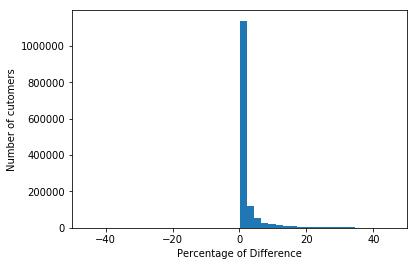

In [47]:
plt.xlim([-50,50])
plt.ylabel('Number of cutomers')
plt.xlabel('Percentage of Difference')


plt.hist(training_predict_actual['difference'], bins=500)

### Test Outlier

In [25]:
test.describe()

,frequency,recency,T,monetary_value
count,1.512194e+06,1.512194e+06,1.512194e+06,1.512194e+06
mean,4.307116e+01,2.745497e+02,3.210690e+02,6.021221e+01
std,4.777198e+01,1.174242e+02,7.611926e+01,5.396387e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000e+00,2.300000e+02,3.220000e+02,2.649600e+01
50%,2.700000e+01,3.370000e+02,3.560000e+02,4.669429e+01
75%,6.300000e+01,3.570000e+02,3.620000e+02,7.944036e+01
max,3.620000e+02,3.640000e+02,3.640000e+02,7.474555e+03


In [26]:
#Delete the outlier
lower_bound = 0.1
upper_bound = 0.95
test.frequency.quantile([lower_bound,upper_bound])

0.10      1.0
0.95    140.0
Name: frequency, dtype: float64

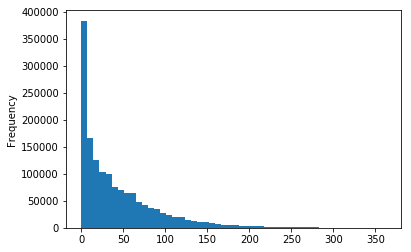

In [27]:
# Looking the rfm frequency distribution
%matplotlib inline
test['frequency'].plot(kind='hist', bins=50)

In [28]:
#Delete the outlier
lower_bound = 0.1
upper_bound = 0.99
test.monetary_value.quantile([lower_bound,upper_bound])

0.10     12.887878
0.99    244.921792
Name: monetary_value, dtype: float64

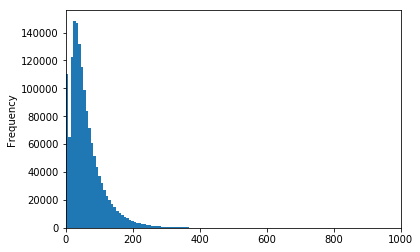

In [29]:
# Looking the rfm frequency distribution
import matplotlib.pyplot as plt
plt.xlim([0,1000])
test['monetary_value'].plot(kind='hist', bins=1000)

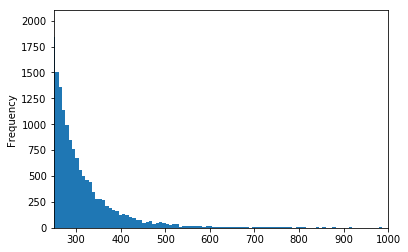

In [30]:
# Looking the rfm frequency distribution
import matplotlib.pyplot as plt
plt.xlim([250,1000])
plt.ylim([0,2100])
test['monetary_value'].plot(kind='hist', bins=1000)

In [70]:
# Not delete the outlier and have a try
test = test.loc[(test['frequency'] > 0) & (test['frequency'] < 250)& (test['monetary_value'] <= 500)]

In [71]:
test = test.loc[(test['frequency'] > 0) & (test['monetary_value'] > 0)]

print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        test['frequency'],
        test['monetary_value']
    ).mean(),
    test[test['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 65.13645509748969, Average profit: 64.13624084849846


In [72]:
test_predict = ggf.conditional_expected_average_profit(
        test['frequency'],
        test['monetary_value'])

In [73]:
test_actual = test['monetary_value']

In [74]:
test_predict_actual = pd.concat([test_actual,test_predict],axis =1)

In [75]:
# Rename the column name
test_predict_actual.columns = ['Actual', 'Predict']

In [76]:
test_predict_actual['difference'] = (test_predict_actual['Predict']-test_predict_actual['Actual'])/test_predict_actual['Actual']

In [77]:
test_predict_actual.head()

,Actual,Predict,difference
customer_id,,,
2100000000,134.787838,135.159068,0.002754
2100000001,31.061558,31.141369,0.002569
2100000002,29.300000,30.830678,0.052242
2100000003,59.866783,59.924445,0.000963
2100000004,19.970553,19.997348,0.001342


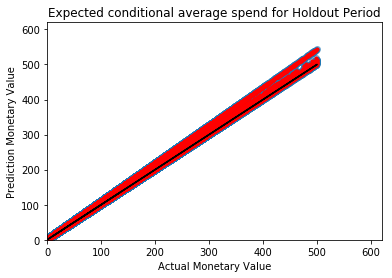

In [80]:
#All cusotmer 
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlim([0,620])
plt.ylim([0,620])
x = test_predict_actual['Actual'] 
y = test_predict_actual['Predict']

plt.plot(x,y,'r.') # x vs y
plt.plot(x,x,'k-') # identity line

plt.ylabel('Prediction Monetary Value')
plt.xlabel('Actual Monetary Value')
plt.title('Expected conditional average spend for Holdout Period')

plt.scatter(x, y, alpha=0.5)
plt.show()

In [79]:
prediction_test = test_predict_actual['Predict'].sum()
actual_test = test_predict_actual['Actual'].sum()
print("Total Amount Prediction:", prediction_test)
print("Total Amount holdout:", actual_test)
print("Difference:", prediction_test - actual_test)
print("Prediction Error :",(prediction_test-actual_test)/actual_test)

Total Amount Prediction: 91667184.6232482
Total Amount holdout: 90259573.10850038
Difference: 1407611.5147478282
Prediction Error : 0.01559514925974388


(array([1.137789e+06, 1.198430e+05, 5.195500e+04, 2.700200e+04,
        1.942000e+04, 1.533900e+04, 1.123400e+04, 8.552000e+03,
        6.714000e+03, 5.359000e+03, 4.552000e+03, 3.578000e+03,
        2.936000e+03, 2.491000e+03, 1.982000e+03, 1.763000e+03,
        1.401000e+03, 1.324000e+03, 1.147000e+03, 1.057000e+03,
        7.240000e+02, 7.490000e+02, 6.470000e+02, 8.010000e+02,
        5.300000e+02, 6.040000e+02, 4.130000e+02, 5.410000e+02,
        2.920000e+02, 3.270000e+02, 2.080000e+02, 4.150000e+02,
        2.200000e+02, 2.310000e+02, 1.820000e+02, 2.460000e+02,
        2.920000e+02, 1.630000e+02, 1.700000e+02, 9.600000e+01,
        1.010000e+02, 9.800000e+01, 3.820000e+02, 6.700000e+01,
        1.180000e+02, 5.400000e+01, 1.330000e+02, 4.800000e+01,
        6.000000e+01, 4.700000e+01, 2.300000e+01, 2.300000e+01,
        3.440000e+02, 4.300000e+01, 7.100000e+01, 1.100000e+01,
        5.200000e+01, 4.100000e+01, 2.800000e+01, 9.800000e+01,
        3.800000e+01, 1.300000e+01, 5.00

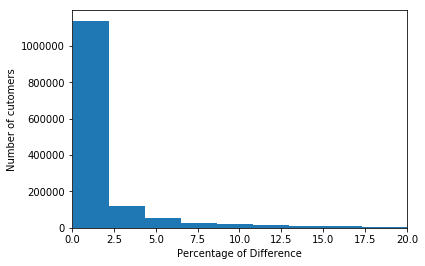

In [65]:
plt.xlim([0,20])
plt.ylabel('Number of cutomers')
plt.xlabel('Percentage of Difference')


plt.hist(training_predict_actual['difference'], bins=500)

# 4. Predicting the customer total monetary value in next 1 year

### Model

In [114]:
# refit the BG model to the summary_with_money_value dataset
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.05)
training_model = training.loc[(training['frequency'] > 0) & (training['frequency'] < 250)& (training['monetary_value'] <= 400)]
bgf.fit(training_model['frequency'], training_model['recency'], training_model['T'])

from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0.05)
ggf.fit(training_model['frequency'],
        training_model['monetary_value'])

customer_lifetime_value = ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    training['frequency'],
    training['recency'],
    training['T'],
    training['monetary_value'],
    time=12, # months
    #discount_rate=0.005, # Yearly discount rate ~6.0%  p.a  = 0.5% per month  
    freq = 'D'
)

### One customer Result

In [115]:
customer_lifetime_value.loc[2101823123]

3521.5703317159287

In [68]:
data.head()

,customer_id,date,quantity,amount
0,2100395099,2017-10-26,17,38.80
1,2100068562,2017-10-12,36,137.25
2,2100006589,2017-10-09,22,91.02
3,2100628482,2018-01-02,8,57.28
4,2100618183,2018-01-11,12,93.47


In [116]:
chunksize = 100000
churn = pd.read_csv('data_20171001_20190930.csv', chunksize=100000, iterator=True)
data = pd.concat(churn, ignore_index=True)
data_20181001_20190930 = data[(data['date'] >=20181001) & (data['date'] <=20190930)]

In [117]:
# Reset the index
data_20181001_20190930 = data_20181001_20190930.set_index('customer_id')

In [104]:
data_20181001_20190930.loc[2101823123].sum()

date        2.139978e+09
quantity    1.174000e+03
amount      6.806400e+03
dtype: float64

In [73]:
training.loc[2101823123]

frequency               66.000000
recency                273.000000
T                      274.000000
monetary_value          43.864394
predicted_purchases     86.221604
P(Alive)                 0.999652
Name: 2101823123, dtype: float64

In [74]:
customer_lifetime_value.head()

customer_id
2100000000    8320.983369
2100000001    3311.877985
2100000002      83.826740
2100000003    8316.226885
2100000004    3551.859029
Name: clv, dtype: float64

In [75]:
data_20181001_20190930.head()

,date,quantity,amount
customer_id,,,
2100920439,20190307,7,22.93
2101292717,20181217,16,52.15
2100257912,20190406,3,16.84
2100591859,20190102,9,28.46
2100168368,20190516,5,13.54


In [119]:
Monetary_Value_Predict_Actual = pd.concat([customer_lifetime_value, data_20181001_20190930.groupby(['customer_id']).sum()['amount']], axis = 1)

In [120]:
Monetary_Value_Predict_Actual.columns = ['Predict', 'Actual']

In [121]:
Monetary_Value_Predict_Actual = Monetary_Value_Predict_Actual.dropna()

In [122]:
prediction = Monetary_Value_Predict_Actual['Predict'].sum()
actual = Monetary_Value_Predict_Actual['Actual'].sum()

In [12]:
print("Total Amount Prediction:", prediction)
print("Total Amount holdout:", actual)
print("Difference:", prediction - actual)
print("Prediction Error :",(prediction-actual)/actual)

Total Amount Prediction: 3985929847.052093
Total Amount holdout: 4164719907.3399987
Difference: -178790060.2879057
Prediction Error : -0.042929672166620844


In [80]:
Monetary_Value_Predict_Actual.describe()

,Predict,Actual
count,1.436304e+06,1.512194e+06
mean,2.734024e+03,2.835046e+03
std,3.325552e+03,3.763246e+03
min,1.705672e-45,2.900000e-01
25%,4.352200e+02,3.471400e+02
50%,1.466406e+03,1.338990e+03
75%,3.846235e+03,3.925440e+03
max,8.664180e+04,4.476014e+05


In [81]:
Monetary_Value_Predict_Actual.head()

,Predict,Actual
customer_id,,
2100000000,8320.983369,5025.42
2100000001,3311.877985,2405.39
2100000002,83.826740,143.11
2100000003,8316.226885,8627.42
2100000004,3551.859029,3976.13


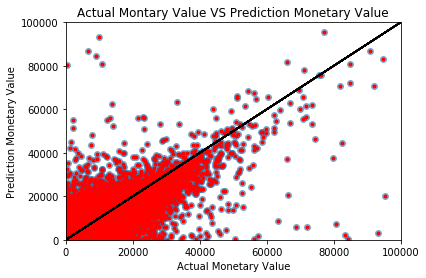

In [33]:
#All cusotmer 
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.xlim([0,100000])
plt.ylim([0,100000])
x = Monetary_Value_Predict_Actual['Actual'] 
y = Monetary_Value_Predict_Actual['Predict']

plt.plot(x,y,'r.') # x vs y
plt.plot(x,x,'k-') # identity line

plt.ylabel('Prediction Monetary Value')
plt.xlabel('Actual Monetary Value')
plt.title('Actual Montary Value VS Prediction Monetary Value')

mpl.rcParams['agg.path.chunksize'] = 100000
plt.scatter(x, y, alpha=0.5)
plt.show()


### Difference

In [14]:
Monetary_Value_Predict_Actual.head()

,Predict,Actual
customer_id,,
2100000000,8320.983369,5025.42
2100000001,3311.877985,2405.39
2100000002,83.826740,143.11
2100000003,8316.226885,8627.42
2100000004,3551.859029,3976.13


In [173]:
# Get the difference for every customer
Monetary_Value_Predict_Actual['Difference'] = round((Monetary_Value_Predict_Actual['Predict'] - Monetary_Value_Predict_Actual['Actual'])/Monetary_Value_Predict_Actual['Actual'],0)
difference = pd.DataFrame(Monetary_Value_Predict_Actual["Difference"].value_counts())
difference = difference.sort_index(ascending=True)

ax = difference.plot(kind='bar')
plt.xlim([-1,11])
plt.ylabel('Number of customers')
plt.xlabel('Range')
plt.title('Range Distribution from -1 to 10')
ax.legend().set_visible(False)
plt.show()

In [174]:
Monetary_Value_Predict_Actual['Difference'].max()

3132.0

In [175]:
Monetary_Value_Predict_Actual['Difference'].min()

-1.0

In [176]:
Monetary_Value_Predict_Actual.head()

,Predict,Actual,Difference
customer_id,,,
2100000000,8320.983369,5025.42,1.0
2100000001,3311.877985,2405.39,0.0
2100000002,83.826740,143.11,-0.0
2100000003,8316.226885,8627.42,-0.0
2100000004,3551.859029,3976.13,-0.0


In [177]:
Monetary_Value_Predict_Actual["Difference"].value_counts().head()

 0.0    814956
-1.0    167816
 1.0    165626
 2.0     58764
 3.0     30173
Name: Difference, dtype: int64

In [178]:
difference = pd.DataFrame(Monetary_Value_Predict_Actual["Difference"].value_counts())

In [179]:
difference = difference.sort_index(ascending=True)

In [180]:
difference_ = difference.reset_index()
difference_[difference_['index']>1]['Difference'].sum()

176384

In [181]:
176605/1331307

0.13265535297268022

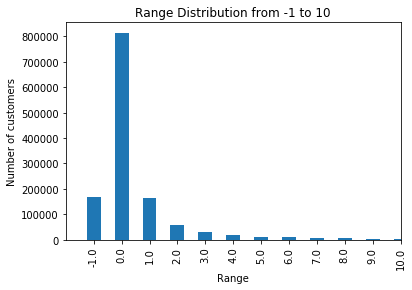

In [182]:
ax = difference.plot(kind='bar')
plt.xlim([-1,11])
plt.ylabel('Number of customers')
plt.xlabel('Range')
plt.title('Range Distribution from -1 to 10')
ax.legend().set_visible(False)
plt.show()

### Round 1

In [229]:
# Get the difference for every customer
Monetary_Value_Predict_Actual['Difference'] = round((Monetary_Value_Predict_Actual['Predict'] - Monetary_Value_Predict_Actual['Actual'])/Monetary_Value_Predict_Actual['Actual'],1)
difference = pd.DataFrame(Monetary_Value_Predict_Actual["Difference"].value_counts())
difference = difference.sort_index(ascending=True)
difference_range = difference[(difference['Difference']>=-1) & (difference['Difference']<=1)]

ax = difference.plot(kind='line')
plt.xlim([-1,1])
plt.ylabel('Number of customers')
plt.xlabel('Prediction Range')
plt.title('Prediction Range Distribution from -1 to 1')
ax.legend().set_visible(False)
plt.show()

In [230]:
difference = pd.DataFrame(Monetary_Value_Predict_Actual["Difference"].value_counts())

In [231]:
difference = difference.sort_index(ascending=True)

In [232]:
difference

,Difference
-1.0,29948
-0.9,18655
-0.8,22931
-0.7,30425
-0.6,40813
-0.5,53895
-0.4,70900
-0.3,94536
-0.2,122371
-0.1,137020


In [233]:
difference_range = difference[(difference['Difference']>=-1) & (difference['Difference']<=1)]

In [234]:
difference_range.head()

,Difference
70.7,1
73.3,1
73.5,1
77.5,1
79.2,1


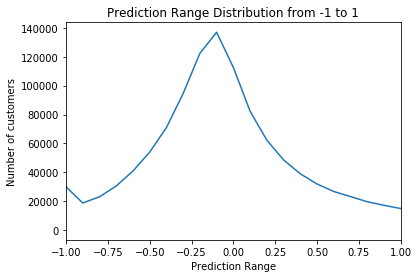

In [236]:
ax = difference.plot(kind='line')
plt.xlim([-1,1])
plt.ylabel('Number of customers')
plt.xlabel('Prediction Range')
plt.title('Prediction Range Distribution from -1 to 1')
ax.legend().set_visible(False)
plt.show()

# New Predict next 1 Year

In [76]:
# refit the BG model to the summary_with_money_value dataset
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.05)
training_model1 = training.loc[(training['frequency'] > 0) & (training['frequency'] < 250)]
bgf.fit(training_model1['frequency'], training_model1['recency'], training_model1['T'])

training_model2 = training.loc[(training['frequency'] > 0) & (training['frequency'] < 250)& (training['monetary_value'] <= 400)]
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0.05)
ggf.fit(training_model2['frequency'],
        training_model2['monetary_value'])

training = training[(training['frequency'] > 0) & (training['monetary_value'] > 0)]
customer_lifetime_value = ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    training['frequency'],
    training['recency'],
    training['T'],
    training['monetary_value'],
    time=72, # months
    discount_rate=0, # Yearly discount rate ~6.0%  p.a  = 0.5% per month  
    freq = 'D'
)

In [103]:
# Next 1 year with rate = 0
customer_lifetime_value.sum()

4289766150.218121

In [111]:
# Next 2 year with rate = 0
customer_lifetime_value.sum()

8537441872.8015375

In [49]:
# Next 3 year with rate = 0
customer_lifetime_value.sum()

12758663416.533411

In [51]:
# Next 4 year with rate = 0
customer_lifetime_value.sum()

16960464788.848444

In [53]:
# Next 5 year with rate = 0
customer_lifetime_value.sum()

21146912517.957623

In [55]:
# Next 6 year with rate = 0
customer_lifetime_value.sum()

25320664565.204487

In [64]:
8537441872 - 4289766150

4247675722

In [65]:
12758663416 - 8537441872

4221221544

In [66]:
16960464788 - 12758663416

4201801372

In [67]:
21146912517-16960464788

4186447729

In [68]:
25320664565 - 21146912517

4173752048

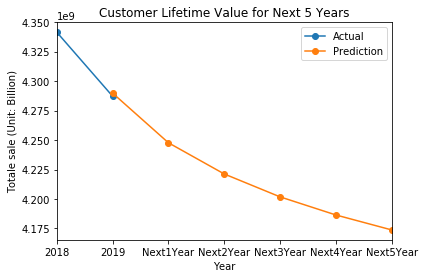

In [69]:
#No Discount 
a= {'Actual':[4341439234,4287138878, None, None, None, None,None],'Prediction':[None,4289766150,4247675722,4221221544,4201801372,4186447729,4173752048] }
a_dataframe = pd.DataFrame(a)
a_dataframe
a_dataframe.rename(index={0: 2018, 1:2019, 2: 'Next1Year', 3:'Next2Year', 4: 'Next3Year', 5:'Next4Year', 6: 'Next5Year'}, inplace= True)

%matplotlib inline
import matplotlib.pyplot as plt

ax = a_dataframe.plot(kind='line',marker='o')

plt.ylabel('Totale sale (Unit: Billion)')
plt.xlabel('Year')
plt.title('Customer Lifetime Value for Next 5 Years')
#ax.legend().set_visible(False)
plt.show()

In [57]:
# Next 1 year with rate = 0.005
customer_lifetime_value.sum()

4153813107.3139668

In [120]:
# Next 2 year with rate = 0.005
customer_lifetime_value.sum()

8027813094.449208

In [59]:
# Next 3 year with rate = 0.005
customer_lifetime_value.sum()

11653989448.302557

In [61]:
# Next 4 year with rate = 0.005
customer_lifetime_value.sum()

15053770797.745281

In [122]:
# Next 5 year with rate = 0.005
customer_lifetime_value.sum()

18244329855.875904

In [63]:
# Next 6 year with rate = 0.005
customer_lifetime_value.sum()

21240413339.285576

In [70]:
8027813094 - 4153813107

3873999987

In [71]:
11653989448 - 8027813094

3626176354

In [72]:
15053770797 - 11653989448

3399781349

In [73]:
18244329855 - 15053770797

3190559058

In [74]:
21240413339 - 18244329855

2996083484

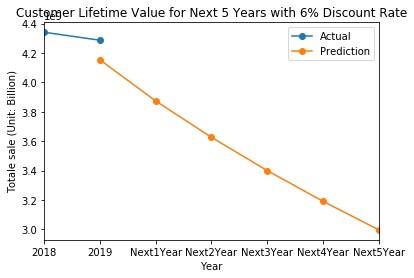

In [75]:
a= {'Actual':[4341439234,4287138878, None, None, None, None,None],'Prediction':[None,4153813107,3873999987,3626176354,3399781349,3190559058,2996083484] }
a_dataframe = pd.DataFrame(a)
a_dataframe
a_dataframe.rename(index={0: 2018, 1:2019, 2: 'Next1Year', 3:'Next2Year', 4: 'Next3Year', 5:'Next4Year', 6: 'Next5Year'}, inplace= True)

%matplotlib inline
import matplotlib.pyplot as plt

ax = a_dataframe.plot(kind='line',marker='o')

plt.ylabel('Totale sale (Unit: Billion)')
plt.xlabel('Year')
plt.title('Customer Lifetime Value for Next 5 Years with 6% Discount Rate')
#ax.legend().set_visible(False)
plt.show()

In [ ]:
#No Discount 
a= {'Actual':[4341439234,4287138878, None, None, None, None,None],'Prediction':[None,None,4235081794,4198668534,4175722851,4158858086,4145514313] }
a_dataframe = pd.DataFrame(a)
a_dataframe
a_dataframe.rename(index={0: 2018, 1:2019, 2: 'Next1Year', 3:'Next2Year', 4: 'Next3Year', 5:'Next4Year', 6: 'Next5Year'}, inplace= True)

%matplotlib inline
import matplotlib.pyplot as plt

ax = a_dataframe.plot(kind='line',marker='o')

plt.ylabel('Totale sale (Unit: Billion)')
plt.xlabel('Year')
plt.title('Customer Lifetime Value for Next 5 Years')
#ax.legend().set_visible(False)
plt.show()

In [104]:
chunksize = 100000
churn = pd.read_csv('data_20171001_20190930.csv', chunksize=100000, iterator=True)
data = pd.concat(churn, ignore_index=True)
data_20181001_20190930 = data[(data['date'] >=20181001) & (data['date'] <=20190930)]
data_20181001_20190930 = data_20181001_20190930.set_index('customer_id')

In [105]:
Monetary_Value_Predict_Actual = pd.concat([customer_lifetime_value, data_20181001_20190930.groupby(['customer_id']).sum()['amount']], axis = 1)
Monetary_Value_Predict_Actual.columns = ['Predict', 'Actual']
Monetary_Value_Predict_Actual = Monetary_Value_Predict_Actual.dropna()
prediction = Monetary_Value_Predict_Actual['Predict'].sum()
actual = Monetary_Value_Predict_Actual['Actual'].sum()
print("Total Amount Prediction:", prediction)
print("Total Amount holdout:", actual)
print("Difference:", prediction - actual)
print("Prediction Error :",(prediction-actual)/actual)

Total Amount Prediction: 4249096698.3389893
Total Amount holdout: 4164719907.3399987
Difference: 84376790.99899054
Prediction Error : 0.020259895713582787


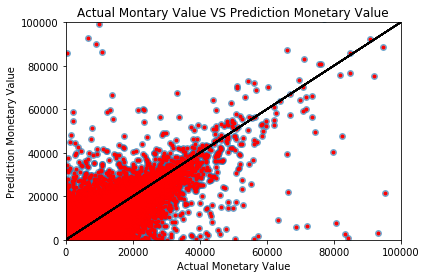

In [106]:
#All cusotmer 
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.xlim([0,100000])
plt.ylim([0,100000])
x = Monetary_Value_Predict_Actual['Actual'] 
y = Monetary_Value_Predict_Actual['Predict']

plt.plot(x,y,'r.') # x vs y
plt.plot(x,x,'k-') # identity line

plt.ylabel('Prediction Monetary Value')
plt.xlabel('Actual Monetary Value')
plt.title('Actual Montary Value VS Prediction Monetary Value')

mpl.rcParams['agg.path.chunksize'] = 100000
plt.scatter(x, y, alpha=0.5)
plt.show()

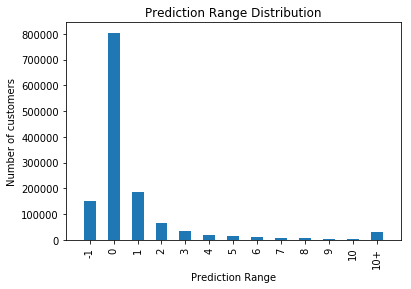

In [108]:
# Get the difference for every customer
Monetary_Value_Predict_Actual['Difference'] = round((Monetary_Value_Predict_Actual['Predict'] - Monetary_Value_Predict_Actual['Actual'])/Monetary_Value_Predict_Actual['Actual'],0)
difference = pd.DataFrame(Monetary_Value_Predict_Actual["Difference"].value_counts())
difference = difference.sort_index(ascending=True)

difference_ten = difference.loc[-1:10]
difference_ten = difference_ten.append({'Difference' : 28832 } , ignore_index=True)
difference_ten.rename(index={0: -1, 1:0, 2: 1, 3:2, 4: 3, 5:4, 6: 5, 7:6, 8: 7, 9:8, 10: 9, 11: 10,12: '10+'}, inplace= True)

ax = difference_ten.plot(kind='bar')
plt.xlim([-1,13])
plt.ylabel('Number of customers')
plt.xlabel('Prediction Range')
plt.title('Prediction Range Distribution')
ax.legend().set_visible(False)
plt.show()

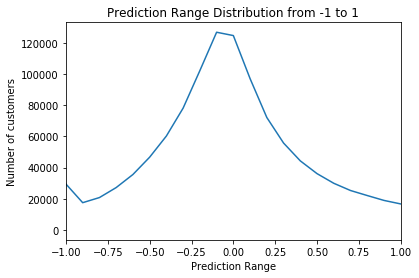

In [109]:
# Get the difference for every customer
Monetary_Value_Predict_Actual['Difference'] = round((Monetary_Value_Predict_Actual['Predict'] - Monetary_Value_Predict_Actual['Actual'])/Monetary_Value_Predict_Actual['Actual'],1)
difference = pd.DataFrame(Monetary_Value_Predict_Actual["Difference"].value_counts())
difference = difference.sort_index(ascending=True)
difference_range = difference[(difference['Difference']>=-1) & (difference['Difference']<=1)]

ax = difference.plot(kind='line')
plt.xlim([-1,1])
plt.ylabel('Number of customers')
plt.xlabel('Prediction Range')
plt.title('Prediction Range Distribution from -1 to 1')
ax.legend().set_visible(False)
plt.show()

# #Modified Graph 5

In [183]:
difference

,Difference
-1.0,167816
0.0,814956
1.0,165626
2.0,58764
3.0,30173
4.0,18390
5.0,12417
6.0,8762
7.0,6722
8.0,4981


In [135]:
difference['portion'] = difference/difference.sum()

In [167]:
difference.loc[1.1:2].sum()

Difference    87286.000000
portion           0.065887
dtype: float64

In [169]:
difference.loc[1.1:2].sum()

Difference    87286.000000
portion           0.065887
dtype: float64

In [170]:
difference.loc[2.1:3].sum()

Difference    39457.000000
portion           0.029784
dtype: float64

In [171]:
difference.loc[3.1:4].sum()

Difference    22617.000000
portion           0.017072
dtype: float64

In [172]:
difference.loc[4.1:5].sum()

Difference    14777.000000
portion           0.011154
dtype: float64

In [149]:
difference_range = difference.loc[-1:1]
difference_range

,Difference,portion
-1.0,29948,0.022606
-0.9,18655,0.014082
-0.8,22931,0.017309
-0.7,30425,0.022966
-0.6,40813,0.030807
-0.5,53895,0.040682
-0.4,70900,0.053518
-0.3,94536,0.071360
-0.2,122371,0.092371
-0.1,137020,0.103428


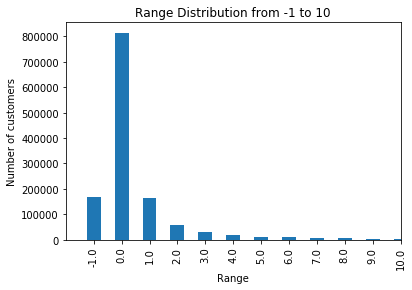

In [184]:
ax = difference.plot(kind='bar')
plt.xlim([-1,11])
plt.ylabel('Number of customers')
plt.xlabel('Range')
plt.title('Range Distribution from -1 to 10')
ax.legend().set_visible(False)
plt.show()

In [188]:
difference.loc[11:].sum()

Difference    28832
dtype: int64

In [219]:
difference_ten = difference.loc[-1:10]
difference_ten = difference_ten.append({'Difference' : 28832 } , ignore_index=True)
difference_ten.rename(index={0: -1, 1:0, 2: 1, 3:2, 4: 3, 5:4, 6: 5, 7:6, 8: 7, 9:8, 10: 9, 11: 10,12: '10+'}, inplace= True)

ax = difference_ten.plot(kind='bar')
plt.xlim([-1,13])
plt.ylabel('Number of customers')
plt.xlabel('Prediction Range')
plt.title('Prediction Range Distribution')
ax.legend().set_visible(False)
plt.show()

In [220]:
difference_ten

,Difference
-1.0,167816
0.0,814956
1.0,165626
2.0,58764
3.0,30173
4.0,18390
5.0,12417
6.0,8762
7.0,6722
8.0,4981


In [221]:
difference_ten = difference_ten.append({'Difference' : 28832 } , ignore_index=True)

In [222]:
difference_ten.rename(index={0: -1, 1:0, 2: 1, 3:2, 4: 3, 5:4, 6: 5, 7:6, 8: 7, 9:8, 10: 9, 11: 10,12: '10+'}, inplace= True)

In [223]:
difference_ten

,Difference
-1,167816
0,814956
1,165626
2,58764
3,30173
4,18390
5,12417
6,8762
7,6722
8,4981


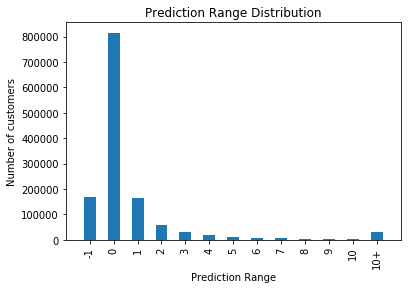

In [227]:
ax = difference_ten.plot(kind='bar')
plt.xlim([-1,13])
plt.ylabel('Number of customers')
plt.xlabel('Prediction Range')
plt.title('Prediction Range Distribution')
ax.legend().set_visible(False)
plt.show()

# # 5Predict CLV for next 5 years

In [5]:
# refit the BG model to the summary_with_money_value dataset
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.05)
training_model = training.loc[(training['frequency'] > 0) & (training['frequency'] < 250)& (training['monetary_value'] <= 400)]
bgf.fit(training_model['frequency'], training_model['recency'], training_model['T'])

from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0.05)
ggf.fit(training_model['frequency'],
        training_model['monetary_value'])

customer_lifetime_value = ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    training['frequency'],
    training['recency'],
    training['T'],
    training['monetary_value'],
    time=24, # months
    #discount_rate=0.005, # Yearly discount rate ~6.0%  p.a  = 0.5% per month  
    freq = 'D'
)

In [254]:
# For the future next 5 years
customer_lifetime_value.sum()

18244940963.91426

In [255]:
18244940963/5

3648988192.6

In [ ]:
#for 20221001~20230930

In [ ]:
#for 20211001~20220930

In [21]:
#for 20201001~20210930
customer_lifetime_value.sum()

15054247056.104692

In [24]:
#for 20191001~20200930 No discount rate
customer_lifetime_value.sum()

7560047437.208447

In [19]:
#for 20191001~20200930
customer_lifetime_value.sum()

11654331983.28207

In [ ]:
1081448757
11654331983
4287138878

4341439234
4287138878

In [249]:
# For 1 year total sales & Prediction is 3985929847.052093
data_20181001_20190930 = data[(data['date'] >=20181001) & (data['date'] <=20190930)]
data_20181001_20190930 = data_20181001_20190930.groupby(['customer_id']).sum()['amount']
data_20181001_20190930.sum()

4287138878.01

In [15]:
# For 1 year before total sales
data_20171001_20180930 = data[(data['date'] >=20171001) & (data['date'] <=20180930)]
data_20171001_20180930 = data_20171001_20180930.groupby(['customer_id']).sum()['amount']
data_20171001_20180930.sum()

4341439234.729999

In [256]:
# Looking at one customer in 20181001 to 20190930
data_20181001_20190930 = data[(data['date'] >=20181001) & (data['date'] <=20190930)]
data_20181001_20190930 = data_20181001_20190930.groupby(['customer_id']).sum()['amount']
data_20181001_20190930.head()

customer_id
2100000000    5025.42
2100000001    2405.39
2100000002     143.11
2100000003    8627.42
2100000004    3976.13
Name: amount, dtype: float64

In [257]:
data_20181001_20190930.loc[2101823123]

6806.399999999997

In [260]:
6806.399999999997*5

34031.999999999985

In [259]:
# Looking at one customer in next 5 years
customer_lifetime_value.loc[2101823123]

15949.308476806222

In [ ]:
# Not delete the outlier and have a try
test = test.loc[(test['frequency'] > 0) & (test['frequency'] < 250)& (test['monetary_value'] <= 500)]

In [37]:
# refit the BG model to the summary_with_money_value dataset
# Not delete the outlier and have a try
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.05)
test_model_1 = test.loc[(test['frequency'] > 0) & (test['frequency'] < 250)]
bgf.fit(test_model_1['frequency'], test_model_1['recency'], test_model_1['T'])

from lifetimes import GammaGammaFitter
test_model_2 = test.loc[(test['frequency'] > 0) & (test['frequency'] < 250)& (test['monetary_value'] <= 500)]
ggf = GammaGammaFitter(penalizer_coef = 0.05)
ggf.fit(test_model_2['frequency'],
        test_model_2['monetary_value'])

test = test.loc[(test['frequency'] > 0) & (test['monetary_value'] > 0)]
customer_lifetime_value = ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    test['frequency'],
    test['recency'],
    test['T'],
    test['monetary_value'],
    time=60, # months
    discount_rate=0, # Yearly discount rate ~6.0%  p.a  = 0.5% per month  
    freq = 'D'
)

In [30]:
# Next 1 year No Discount
customer_lifetime_value.sum()

4235081794.6318283

In [32]:
# Next 2 year No Discount
customer_lifetime_value.sum()

8433750328.229081

In [34]:
# Next 3 year No Discount
customer_lifetime_value.sum()

12609473179.949987

In [36]:
# Next 4 year No Discount
customer_lifetime_value.sum()

16768331265.553251

In [39]:
# Next 5 year No Discount
customer_lifetime_value.sum()

20913845578.43279

In [99]:
# Next 1 year No Discount
customer_lifetime_value.sum()

354491454.4554068

In [28]:
# Next 1 year  Discount
customer_lifetime_value.sum()

4100828219.955612

In [97]:
# Next 1 year  Discount rate =1 
customer_lifetime_value.sum()

4235081794.6318283

In [32]:
# Next 2 year  Discount
customer_lifetime_value.sum()

7930114857.328513

In [34]:
# Next 2 year  No Discount
customer_lifetime_value.sum()

7467660062.877765

In [40]:
# Next 3 year  Discount
customer_lifetime_value.sum()

11517194823.571356

In [43]:
# Next 4 year  Discount
customer_lifetime_value.sum()

14882221435.873621

In [45]:
# Next 5 year  Discount
customer_lifetime_value.sum()

18041578165.634468

In [64]:
a= {'Actual':[4341439234,4287138878, None, None, None, None,None],'Prediction':[None,None,4100828219,7930114857,11517194823,14882221435,18041578165] }
a_dataframe = pd.DataFrame(a)
a_dataframe
a_dataframe.rename(index={0: 2018, 1:2019, 2: 'Next1Year', 3:'Next2Year', 4: 'Next3Year', 5:'Next4Year', 6: 'Next5Year'}, inplace= True)

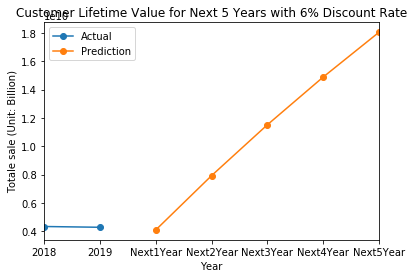

In [71]:
ax = a_dataframe.plot(kind='line',marker='o')

plt.ylabel('Totale sale (Unit: Billion)')
plt.xlabel('Year')
plt.title('Customer Lifetime Value for Next 5 Years with 6% Discount Rate')
#ax.legend().set_visible(False)
plt.show()

In [25]:
a= {'Actual':[4341439234,4287138878, None, None, None, None,None],'Prediction':[None,None,4100828219,3829286638,3587079966,3365026612,3159356730] }
a_dataframe = pd.DataFrame(a)
a_dataframe
a_dataframe.rename(index={0: 2018, 1:2019, 2: 'Next1Year', 3:'Next2Year', 4: 'Next3Year', 5:'Next4Year', 6: 'Next5Year'}, inplace= True)

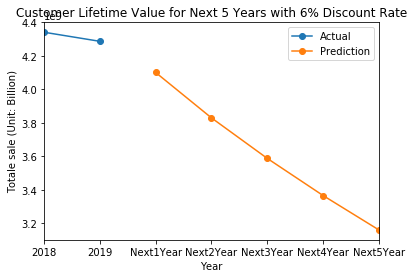

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = a_dataframe.plot(kind='line',marker='o')

plt.ylabel('Totale sale (Unit: Billion)')
plt.xlabel('Year')
plt.title('Customer Lifetime Value for Next 5 Years with 6% Discount Rate')
#ax.legend().set_visible(False)
plt.show()

In [20]:
7930114857-4100828219

3829286638

In [21]:
11517194823-7930114857

3587079966

In [22]:
14882221435 - 11517194823

3365026612

In [23]:
18041578165 - 14882221435

3159356730

In [ ]:
#No Discount 
a= {'Actual':[4341439234,4287138878, None, None, None, None,None],'Prediction':[None,None,4235081794,8433750328,12609473179,16768331265,20913845578] }
a_dataframe = pd.DataFrame(a)
a_dataframe
a_dataframe.rename(index={0: 2018, 1:2019, 2: 'Next1Year', 3:'Next2Year', 4: 'Next3Year', 5:'Next4Year', 6: 'Next5Year'}, inplace= True)

In [38]:
8433750328-4235081794

4198668534

In [40]:
12609473179 - 8433750328

4175722851

In [41]:
16768331265-12609473179

4158858086

In [42]:
20913845578 - 16768331265

4145514313

In [44]:
#No Discount 
a= {'Actual':[4341439234,4287138878, None, None, None, None,None],'Prediction':[None,None,4235081794,4198668534,4175722851,4158858086,4145514313] }
a_dataframe = pd.DataFrame(a)
a_dataframe
a_dataframe.rename(index={0: 2018, 1:2019, 2: 'Next1Year', 3:'Next2Year', 4: 'Next3Year', 5:'Next4Year', 6: 'Next5Year'}, inplace= True)


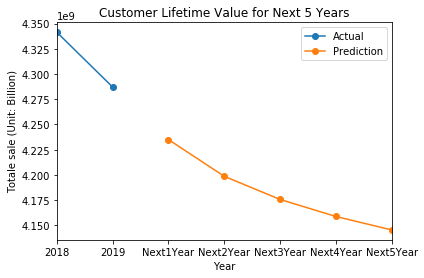

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = a_dataframe.plot(kind='line',marker='o')

plt.ylabel('Totale sale (Unit: Billion)')
plt.xlabel('Year')
plt.title('Customer Lifetime Value for Next 5 Years')
#ax.legend().set_visible(False)
plt.show()

In [ ]:
# refit the BG model to the summary_with_money_value dataset
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.05)
training_model1 = training.loc[(training['frequency'] > 0) & (training['frequency'] < 250)]
bgf.fit(training_model1['frequency'], training_model1['recency'], training_model1['T'])

training_model2 = training.loc[(training['frequency'] > 0) & (training['frequency'] < 250)& (training['monetary_value'] <= 400)]
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0.05)
ggf.fit(training_model2['frequency'],
        training_model2['monetary_value'])

training = training[(training['frequency'] > 0) & (training['monetary_value'] > 0)]
customer_lifetime_value = ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    training['frequency'],
    training['recency'],
    training['T'],
    training['monetary_value'],
    time=36, # months
    discount_rate=0.0, # Yearly discount rate ~6.0%  p.a  = 0.5% per month  
    freq = 'D'
)

## Modified Graph 6 (P of churn) and CLV for 5 years

In [ ]:
# refit the BG model to the summary_with_money_value dataset
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.05)
training_model1 = training.loc[(training['frequency'] > 0) & (training['frequency'] < 250)]
bgf.fit(training_model1['frequency'], training_model1['recency'], training_model1['T'])

training_model2 = training.loc[(training['frequency'] > 0) & (training['frequency'] < 250)& (training['monetary_value'] <= 400)]
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0.05)
ggf.fit(training_model2['frequency'],
        training_model2['monetary_value'])

training = training[(training['frequency'] > 0) & (training['monetary_value'] > 0)]
customer_lifetime_value = ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    training['frequency'],
    training['recency'],
    training['T'],
    training['monetary_value'],
    time=72, # months
    discount_rate=0, # Yearly discount rate ~6.0%  p.a  = 0.5% per month  
    freq = 'D'
)

In [89]:
# refit the BG model to the summary_with_money_value dataset
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.05)
training_model1 = training.loc[(training['frequency'] > 0) & (training['frequency'] < 250)]
bgf.fit(training_model1['frequency'], training_model1['recency'], training_model1['T'])

training_model2 = training.loc[(training['frequency'] > 0) & (training['frequency'] < 250)& (training['monetary_value'] <= 400)]
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0.05)
ggf.fit(training_model2['frequency'],
        training_model2['monetary_value'])

training = training[(training['frequency'] > 0) & (training['monetary_value'] > 0)]
customer_lifetime_value_60 = ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    training['frequency'],
    training['recency'],
    training['T'],
    training['monetary_value'],
    time=60, # months
    discount_rate=0, # Yearly discount rate ~6.0%  p.a  = 0.5% per month  
    freq = 'D'
)

In [79]:
customer_lifetime_value.head()

customer_id
2100000000    52391.176588
2100000001    20852.125736
2100000002      523.999424
2100000003    52362.123545
2100000004    22363.437929
Name: clv, dtype: float64

In [90]:
customer_lifetime_value_60.head()

customer_id
2100000000    43753.026011
2100000001    17414.096735
2100000002      437.855388
2100000003    43728.699803
2100000004    18676.205446
Name: clv, dtype: float64

In [91]:
customer_lifetime_value.shape

(1444345,)

In [92]:
customer_lifetime_value_60.shape

(1444345,)

In [80]:
test_probability_alive['P(Alive)'].head()

customer_id
2100000000    0.878152
2100000001    0.999139
2100000002    0.992467
2100000003    0.998067
2100000004    0.999911
Name: P(Alive), dtype: float64

In [94]:
clv_5years = pd.concat([customer_lifetime_value - customer_lifetime_value_60,test_probability_alive['P(Alive)']],axis = 1).dropna()

In [97]:
clv_5years['Churn'] = 1- clv_5years['P(Alive)']

In [98]:
clv_5years.loc[2101823123]

clv         3645.90206
P(Alive)       0.99983
Churn          0.00017
Name: 2101823123, dtype: float64

In [99]:
clv_5years.head()

,clv,P(Alive),Churn
customer_id,,,
2100000000,8638.150577,0.878152,0.121848
2100000001,3438.029001,0.999139,0.000861
2100000002,86.144036,0.992467,0.007533
2100000003,8633.423742,0.998067,0.001933
2100000004,3687.232483,0.999911,0.000089


KeyboardInterrupt: 

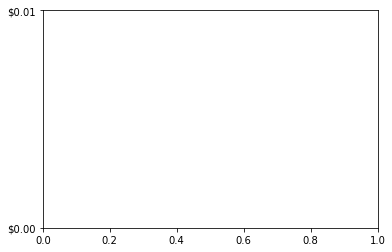

In [106]:
x = clv_5years['Churn']
y = clv_5years['clv'].map('${:,.2f}'.format)
ax = plt.scatter(x, y, alpha=0.5)

#training_describe['Average daily purchased spent'] = training_describe['Average daily purchased spent'].map('${:,.2f}'.format)
plt.ylabel('Total $Spend in the Year 2024')
plt.xlabel('Probability of Churn')
plt.title('Customer Lifetime Value with probability of churn')
#ax.legend().set_visible(False)
plt.show()

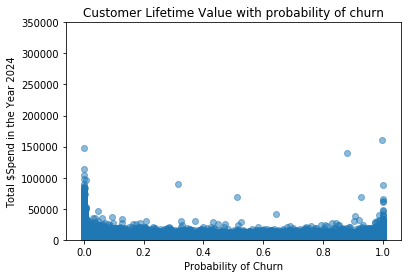

In [105]:
x = clv_5years['Churn']
y = clv_5years['clv']
ax = plt.scatter(x, y, alpha=0.5)

plt.ylim([0,350000])
plt.ylabel('Total $Spend in the Year 2024')
plt.xlabel('Probability of Churn')
plt.title('Customer Lifetime Value with probability of churn')
#ax.legend().set_visible(False)
plt.show()

In [130]:
# Used the past 2 years data
chunksize = 100000
churn = pd.read_csv('data_20171001_20190930.csv', chunksize=100000, iterator=True)
data = pd.concat(churn, ignore_index=True)
data_head = data.head()
data_head['amount'] = data_head['amount'].map('${:,.2f}'.format)

Monetary_Value_Predict_Actual = pd.concat([test_probability_alive['churn'], data.groupby(['customer_id']).sum()['amount']], axis = 1)

In [85]:
x = zz['churn']
y = Monetary_Value_Predict_Actual['amount']
ax = plt.scatter(x, y, alpha=0.5)

plt.ylim(0, 350000)
plt.ylabel('Total $Spend between 20171001 to 20190930')
plt.xlabel('Probability of Churn')
plt.title('Customer total spend with probability of churn')
#ax.legend().set_visible(False)
plt.show()

NameError: name 'Monetary_Value_Predict_Actual' is not defined

# #CLV Function

In [ ]:
# refit the BG model to the summary_with_money_value dataset
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.05)
training_model = training.loc[(training['frequency'] > 0) & (training['frequency'] < 250)& (training['monetary_value'] <= 400)]
bgf.fit(training_model['frequency'], training_model['recency'], training_model['T'])

from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0.05)
ggf.fit(training_model['frequency'],
        training_model['monetary_value'])

customer_lifetime_value = ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    training['frequency'],
    training['recency'],
    training['T'],
    training['monetary_value'],
    time=12, # months
    #discount_rate=0.005, # Yearly discount rate ~6.0%  p.a  = 0.5% per month  
    freq = 'D'
)

In [13]:
df = pd.DataFrame(index=training['frequency'].index)
df.head()

""
customer_id
2100000000
2100000001
2100000002
2100000003
2100000004


In [14]:
df["clv"] = 0
df.head()

,clv
customer_id,
2100000000,0
2100000001,0
2100000002,0
2100000003,0
2100000004,0


In [16]:
time = 12
steps = np.arange(1, time + 1)
steps

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [18]:
freq = 'D'
factor = {"W": 4.345, "M": 1.0, "D": 30, "H": 30 * 24}[freq]
factor

30

In [19]:
steps * factor

array([ 30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360])

In [ ]:
    df = pd.DataFrame(index=frequency.index)
    df["clv"] = 0  # initialize the clv column to zeros

    steps = np.arange(1, time + 1)
    factor = {"W": 4.345, "M": 1.0, "D": 30, "H": 30 * 24}[freq]